# TAREAS. Cerrar el dataset de videos
-Aplicarle la transformación a las variables escritas de modelo de lenguaje.
-Tranformación de variables?
-Iniciar el proceso de exploratorio 

## PLANINNG Consolidación de los dataset y análisis exploratorio
1. Creación de dos datasets específicos para vídeos y Canales
2. Transformación de variables
3. EDA
3.1 Análisis monovariable
3.2 Análisis multivariable
3.3 Feature selection
3.4 Transformación de variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler, Normalizer
from sentence_transformers import SentenceTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import time
import pickle
import joblib, json, os
from sklearn.base import BaseEstimator, TransformerMixin




In [2]:
# def predict_and_get_auc(model):
    
#     y_train_prob = model.predict_proba(X_train)
#     y_test_prob = model.predict_proba(X_test)

#     fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:, 1])
#     print("AUC train = ", round(auc(fpr, tpr), 2))

#     fpr, tpr, threshold = roc_curve(y_test, y_test_prob[:, 1])
#     print("AUC test = ", round(auc(fpr, tpr), 2))

In [3]:
df=pd.read_csv('/Users/danielmunoz/Documents/EDUCACION/DATA_ANALIST/CURSOS/TFM/DATA/RAW/DATASET/180925dataset_definitivo.csv')

In [4]:
df.describe()

duration_minutes   category_id         views         likes  \
count      23248.000000  23248.000000  2.324800e+04  2.324800e+04   
mean          24.500642     21.411992  1.327014e+05  4.807274e+03   
std           61.648134      5.272078  1.354465e+06  5.341031e+04   
min            0.050000      1.000000  0.000000e+00  0.000000e+00   
25%            0.916667     20.000000  3.479000e+03  9.100000e+01   
50%            4.333333     22.000000  1.359350e+04  3.870000e+02   
75%           21.850000     24.000000  3.507275e+04  1.431000e+03   
max          821.700000     29.000000  9.439926e+07  4.567284e+06   

            comments    tags_count  views_per_day  video_age_days  \
count   23248.000000  23248.000000   2.324800e+04    23248.000000   
mean      279.245053     10.884936   8.442293e+04        2.483741   
std      3229.255645     11.912077   7.021101e+05        1.305818   
min         0.000000      0.000000   0.000000e+00        0.000000   
25%         2.000000      0.000000   1.175333e+03        3.000000   
50%        14.000000      8.000000   4.914667e+03        3.000000   
75%        80.000000     20.000000   1.478650e+04        3.000000   
max    377019.000000     74.000000   7.132659e+07       27.000000   

       subscriber_count  channel_video_count  channel_views  channel_age_days  \
count      2.324800e+04         23248.000000   2.324800e+04      23248.000000   
mean       1.395823e+06          4834.352030   6.086550e+08       2598.983267   
std        5.514385e+06         18492.039433   2.487876e+09       1947.712100   
min        0.000000e+00             1.000000   0.000000e+00          3.000000   
25%        1.500000e+04           187.000000   3.099150e+06        782.000000   
50%        1.020000e+05           664.000000   2.514359e+07       2328.000000   
75%        6.600000e+05          2047.000000   2.121690e+08       4151.000000   
max        4.150000e+08        258003.000000   9.074295e+10       7383.000000   

        mostpopular  engagement_rate     efficiency  engagement_subscribers  \
count  23248.000000     23248.000000   23248.000000            23248.000000   
mean       0.266259         0.049489      58.536557                1.372737   
std        0.442011         0.048631    1698.036670              106.213650   
min        0.000000         0.000000       0.000000                0.000000   
25%        0.000000         0.015697       0.111437                0.000765   
50%        0.000000         0.037254       0.744138                0.004156   
75%        1.000000         0.069170       3.916952                0.020506   
max        1.000000         1.592233  201779.000000            13195.000000   

       frecuencia_videos  views_rate_video  likes_per_view  comments_per_view  
count       23248.000000      2.324800e+04    23248.000000       23248.000000  
mean            1.570173      6.414221e+05        0.045197           0.004292  
std             4.713422      5.062204e+06        0.043996           0.009749  
min             0.000515      0.000000e+00        0.000000           0.000000  
25%             0.166969      8.059695e+03        0.014430           0.000197  
50%             0.482811      3.266854e+04        0.034188           0.001316  
75%             1.048214      1.595043e+05        0.063818           0.004515  
max           102.524138      2.240574e+08        1.553398           0.288752

In [5]:
df['mostpopular'].value_counts()

mostpopular
0    17058
1     6190
Name: count, dtype: int64

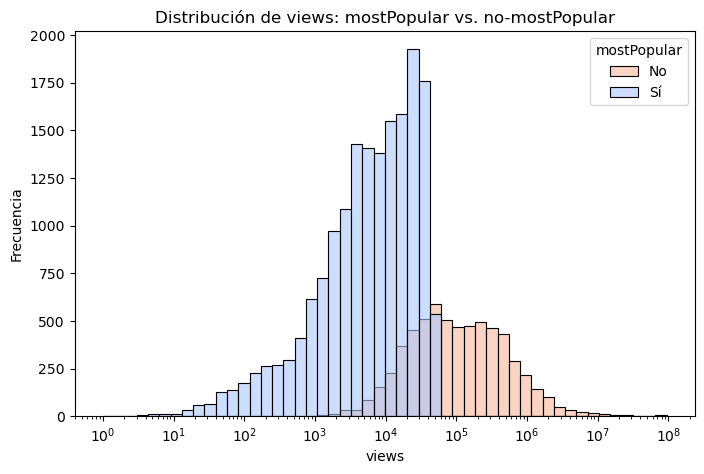

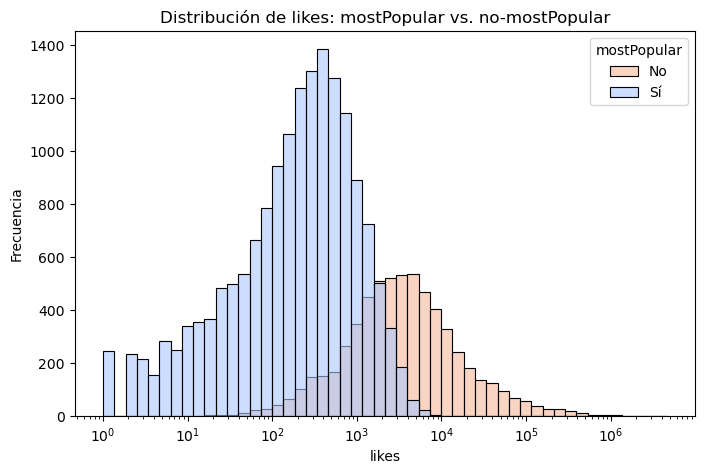

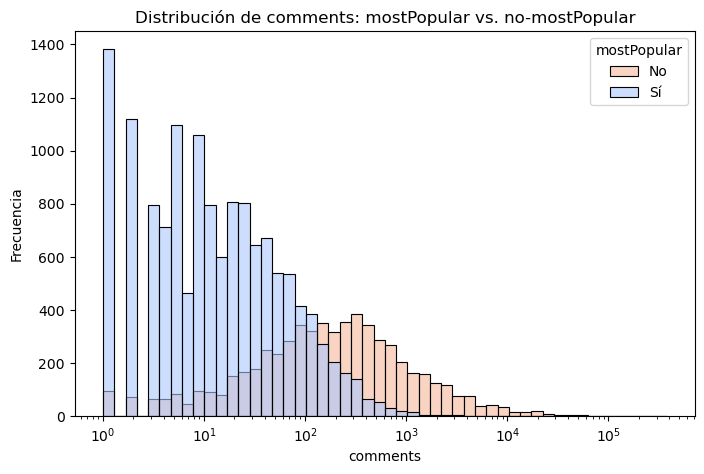

In [6]:
variables = ["views", "likes", "comments"]
for var in variables:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=var, hue="mostpopular", bins=50, log_scale=True, 
                 palette="coolwarm", alpha=0.6)
    plt.title(f"Distribución de {var}: mostPopular vs. no-mostPopular")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.legend(title="mostPopular", labels=["No", "Sí"])
    plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                23248 non-null  object 
 1   title                   23248 non-null  object 
 2   description             19598 non-null  object 
 3   published_at            23248 non-null  object 
 4   duration_minutes        23248 non-null  float64
 5   definition              23248 non-null  object 
 6   licensed_content        23248 non-null  bool   
 7   has_caption             23248 non-null  bool   
 8   category_id             23248 non-null  float64
 9   views                   23248 non-null  float64
 10  likes                   23248 non-null  float64
 11  comments                23248 non-null  float64
 12  tags                    14451 non-null  object 
 13  tags_count              23248 non-null  float64
 14  views_per_day           23248 non-null

In [8]:
print(df.columns)

Index(['video_id', 'title', 'description', 'published_at', 'duration_minutes',
       'definition', 'licensed_content', 'has_caption', 'category_id', 'views',
       'likes', 'comments', 'tags', 'tags_count', 'views_per_day',
       'video_age_days', 'subscriber_count', 'channel_id', 'channel_title',
       'channel_description', 'channel_video_count', 'channel_views',
       'channel_created', 'channel_age_days', 'mostpopular', 'source_file',
       'engagement_rate', 'efficiency', 'engagement_subscribers',
       'frecuencia_videos', 'views_rate_video', 'likes_per_view',
       'comments_per_view'],
      dtype='object')


Verificamos que solo hay un video por columna, y de esta forma podemos eliminar el 'video_id' para llevar a cabo nuestro EDA. Por contra mantendremos el del canal, ya que nos va a permitir seleccionar y agrupar la informacion entorno a un canal y poder hacer un split en el train y test en el que no se repita el mismo canal.

In [9]:
df['mostpopular'].value_counts()

mostpopular
0    17058
1     6190
Name: count, dtype: int64

In [10]:
df["video_id"].nunique() == len(df)

True

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                23248 non-null  object 
 1   title                   23248 non-null  object 
 2   description             19598 non-null  object 
 3   published_at            23248 non-null  object 
 4   duration_minutes        23248 non-null  float64
 5   definition              23248 non-null  object 
 6   licensed_content        23248 non-null  bool   
 7   has_caption             23248 non-null  bool   
 8   category_id             23248 non-null  float64
 9   views                   23248 non-null  float64
 10  likes                   23248 non-null  float64
 11  comments                23248 non-null  float64
 12  tags                    14451 non-null  object 
 13  tags_count              23248 non-null  float64
 14  views_per_day           23248 non-null

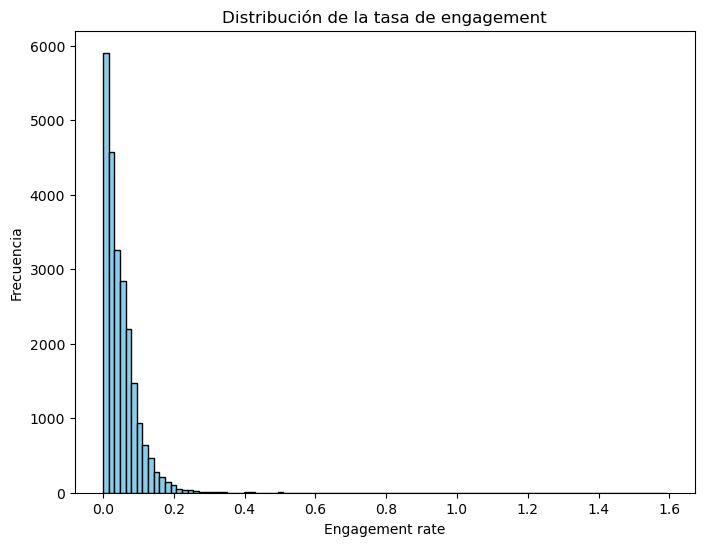

In [12]:
plt.figure(figsize=(8,6))
plt.hist(df["engagement_rate"].dropna(), bins=100, color="skyblue", edgecolor="black")
plt.xlabel("Engagement rate")
plt.ylabel("Frecuencia")
plt.title("Distribución de la tasa de engagement")
plt.show()

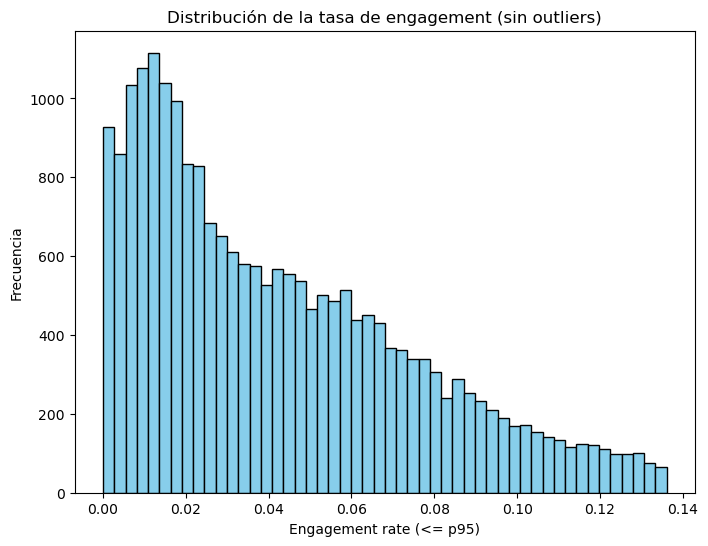

In [13]:
p95 = df["engagement_rate"].quantile(0.95)

plt.figure(figsize=(8,6))
plt.hist(df[df["engagement_rate"] <= p95]["engagement_rate"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Engagement rate (<= p95)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la tasa de engagement (sin outliers)")
plt.show()

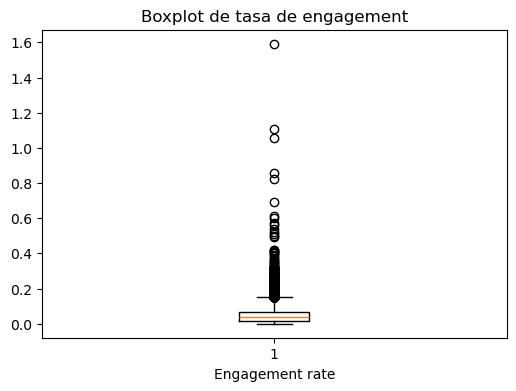

In [14]:
plt.figure(figsize=(6,4))
plt.boxplot(df["engagement_rate"])
plt.xlabel("Engagement rate")
plt.title("Boxplot de tasa de engagement")
plt.show()

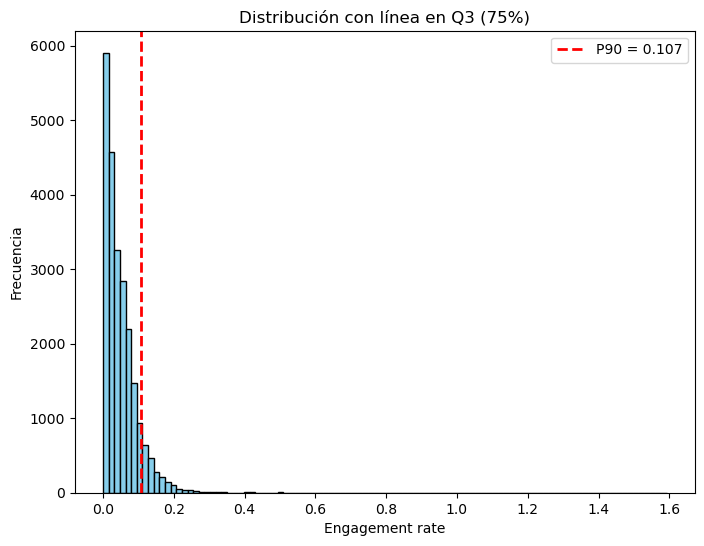

In [15]:
# Calcular Q3 (percentil 75)
p90 = df["engagement_rate"].quantile(0.90)

# Crear columna indicador: 1 si está en el top 25%, 0 en caso contrario
df["engagement_top25"] = (df["engagement_rate"] >= p90).astype(int)


plt.figure(figsize=(8,6))
plt.hist(df["engagement_rate"], bins=100, color="skyblue", edgecolor="black")
plt.axvline(p90, color="red", linestyle="--", linewidth=2, label=f"P90 = {p90:.3f}")
plt.xlabel("Engagement rate")
plt.ylabel("Frecuencia")
plt.title("Distribución con línea en Q3 (75%)")
plt.legend()
plt.show()

In [16]:
# Crear columna meta: 0 si está por debajo de Q3, 1 si está en Q3 o superior
df["target_engagement"] = (df["engagement_rate"] >= p90).astype(int)

# Revisión rápida
print("Threshold P90:", p90)
print(df["target_engagement"].value_counts(normalize=True))

Threshold P90: 0.1065573770491803
target_engagement
0    0.899948
1    0.100052
Name: proportion, dtype: float64


En la construcción de los dataframes individualizados, uno para vídeo el otro para canal, priorizamos el de video. Partimos de la idea de una linea por vídeo. Para posteriormente trabajar un nuevo dataset de una línea por canal. 

En el dataset a nivel de vídeo se han seleccionado únicamente las variables numéricas y agregadas de los canales, con el fin de evitar redundancias derivadas de la repetición de información por canal. Esta decisión responde a la naturaleza jerárquica de los datos (vídeo–canal), donde un mismo canal puede estar asociado a múltiples vídeos. Incluir de manera directa todas las variables de canal podría inducir al modelo a aprender patrones específicos de canales repetidos, lo que reduciría su robustez y capacidad de generalización. Por esta razón, en la partición train–test se toma al canal como unidad central de separación, garantizando que los vídeos de un mismo canal no aparezcan en ambos subconjuntos. De esta forma, se minimiza la fuga de información y se mejora la validez del análisis predictivo.

En el dataset de modelado se conservan únicamente las variables derivadas video_age_days y channel_age_days, dado que representan de forma más eficiente y útil la información temporal asociada a los vídeos y canales. Las fechas originales (published_at y channel_created) se mantienen en el dataset bruto únicamente con fines exploratorios y de visualización

In [17]:
df['duration_minutes'].value_counts()

duration_minutes
1.000000      250
0.266667      215
0.983333      166
0.333333      164
0.316667      164
             ... 
80.166667       1
46.900000       1
103.666667      1
79.800000       1
45.183333       1
Name: count, Length: 4818, dtype: int64

In [18]:
columnas_numericas = ["views", "likes","tags_count", 'comments',"subscriber_count", "video_age_days","channel_video_count","channel_views","channel_age_days"]

for col in columnas_numericas:
    df[col] = df[col].astype("int64")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                23248 non-null  object 
 1   title                   23248 non-null  object 
 2   description             19598 non-null  object 
 3   published_at            23248 non-null  object 
 4   duration_minutes        23248 non-null  float64
 5   definition              23248 non-null  object 
 6   licensed_content        23248 non-null  bool   
 7   has_caption             23248 non-null  bool   
 8   category_id             23248 non-null  float64
 9   views                   23248 non-null  int64  
 10  likes                   23248 non-null  int64  
 11  comments                23248 non-null  int64  
 12  tags                    14451 non-null  object 
 13  tags_count              23248 non-null  int64  
 14  views_per_day           23248 non-null

In [20]:
df = df.drop(columns=["engagement_top25"])


### EDA - VARIABLES NUMERICAS

In [21]:
df_EDA_numericas_bruto=df[['duration_minutes','views', 'likes' , 'comments' , 'tags_count', 'video_age_days', 'subscriber_count','channel_video_count', 'channel_views', 'channel_age_days']]

In [22]:
df_EDA_numericas_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   duration_minutes     23248 non-null  float64
 1   views                23248 non-null  int64  
 2   likes                23248 non-null  int64  
 3   comments             23248 non-null  int64  
 4   tags_count           23248 non-null  int64  
 5   video_age_days       23248 non-null  int64  
 6   subscriber_count     23248 non-null  int64  
 7   channel_video_count  23248 non-null  int64  
 8   channel_views        23248 non-null  int64  
 9   channel_age_days     23248 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.8 MB


In [23]:
# Columnas en cada dataset
cols_EDA = set(df_EDA_numericas_bruto.columns)
cols_total = set(df.columns)

# Columnas que están en ambos
comunes = cols_EDA & cols_total

# Columnas que están solo en df_video
solo_EDA_numerico = cols_EDA - cols_total

# Columnas que están solo en df
solo_total = cols_total - cols_EDA

print("Columnas comunes:", comunes)
print("Solo en df_EDA_numericas_bruto:", cols_EDA)
print("Solo en df:", solo_total)

Columnas comunes: {'likes', 'tags_count', 'views', 'channel_age_days', 'subscriber_count', 'channel_views', 'comments', 'video_age_days', 'duration_minutes', 'channel_video_count'}
Solo en df_EDA_numericas_bruto: {'likes', 'tags_count', 'channel_age_days', 'subscriber_count', 'channel_video_count', 'channel_views', 'comments', 'video_age_days', 'duration_minutes', 'views'}
Solo en df: {'efficiency', 'has_caption', 'comments_per_view', 'published_at', 'category_id', 'tags', 'channel_created', 'source_file', 'likes_per_view', 'description', 'definition', 'target_engagement', 'channel_title', 'views_rate_video', 'video_id', 'engagement_subscribers', 'engagement_rate', 'title', 'channel_description', 'frecuencia_videos', 'channel_id', 'licensed_content', 'views_per_day', 'mostpopular'}


VIEWS

In [24]:
df['mostpopular'].value_counts(True)*100

mostpopular
0    73.374054
1    26.625946
Name: proportion, dtype: float64

<Axes: xlabel='mostpopular', ylabel='views'>

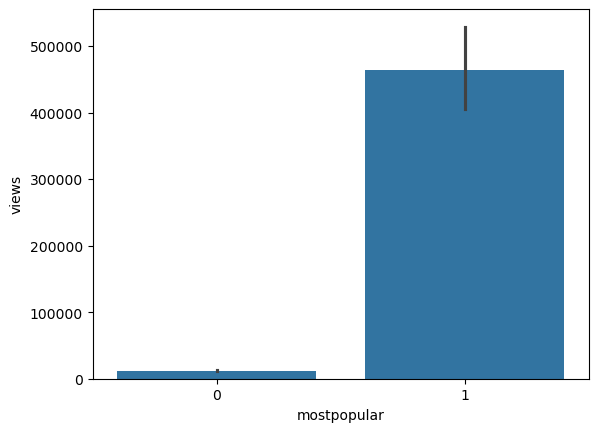

In [25]:
sns.barplot(df, x = 'mostpopular', y = 'views')

<Axes: xlabel='mostpopular', ylabel='views'>

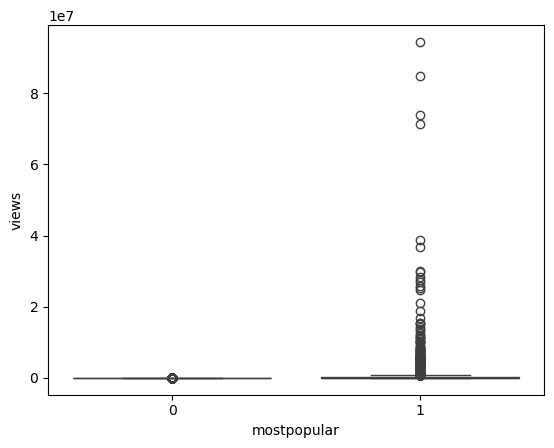

In [26]:
sns.boxplot(x='mostpopular', y='views', data=df)

<Axes: xlabel='mostpopular', ylabel='views'>

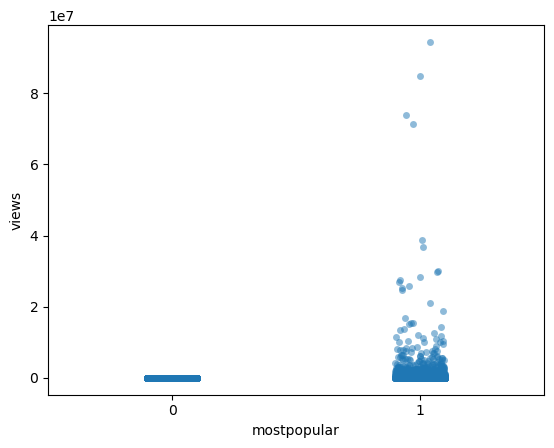

In [27]:
sns.stripplot(x="mostpopular", y="views", data=df, jitter=True, alpha=0.5)

VIEWS-ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='views'>

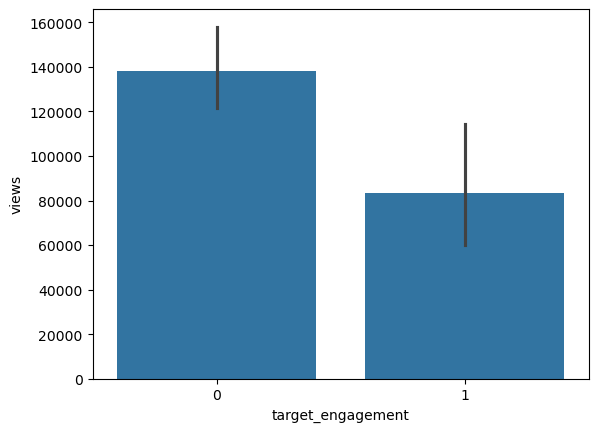

In [28]:
sns.barplot(df, x = 'target_engagement', y = 'views')

<Axes: xlabel='target_engagement', ylabel='views'>

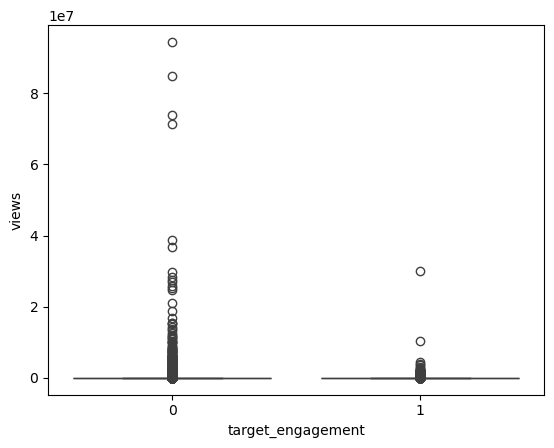

In [29]:
sns.boxplot(x='target_engagement', y='views', data=df)

<Axes: xlabel='target_engagement', ylabel='views'>

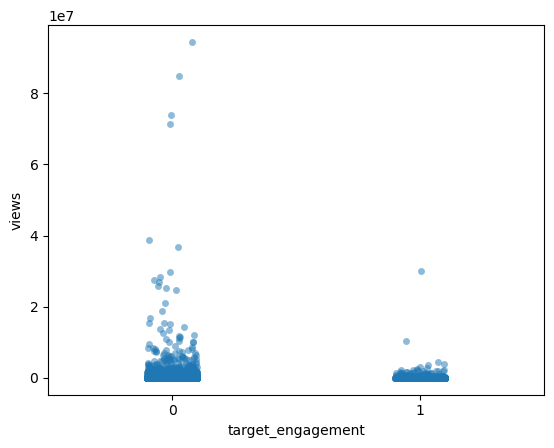

In [30]:
sns.stripplot(x="target_engagement", y="views", data=df, jitter=True, alpha=0.5)

LIKES


<Axes: xlabel='mostpopular', ylabel='likes'>

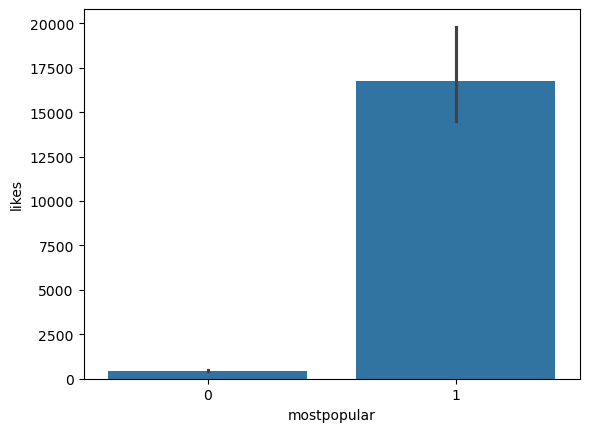

In [31]:
sns.barplot(df, x = 'mostpopular', y = 'likes')

<Axes: xlabel='mostpopular', ylabel='likes'>

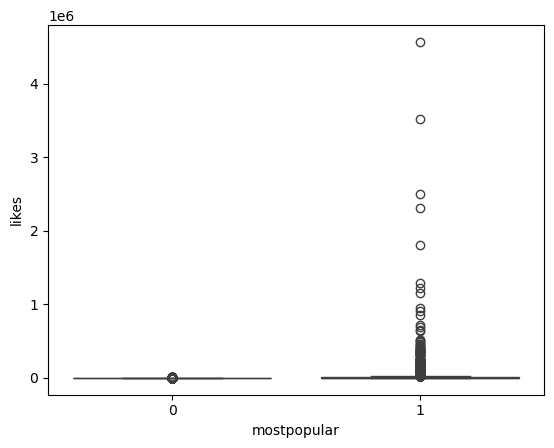

In [32]:
sns.boxplot(x='mostpopular', y='likes', data=df)

<Axes: xlabel='mostpopular', ylabel='likes'>

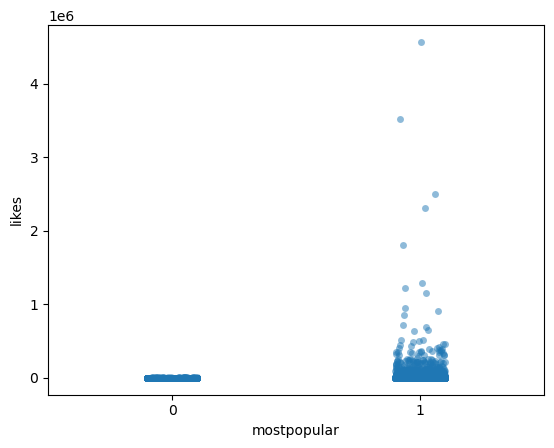

In [33]:
sns.stripplot(x="mostpopular", y="likes", data=df, jitter=True, alpha=0.5)

LIKES-ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='likes'>

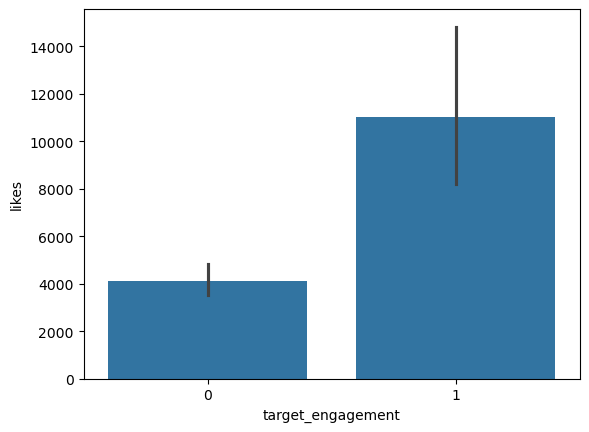

In [34]:
sns.barplot(df, x = 'target_engagement', y = 'likes')

<Axes: xlabel='target_engagement', ylabel='likes'>

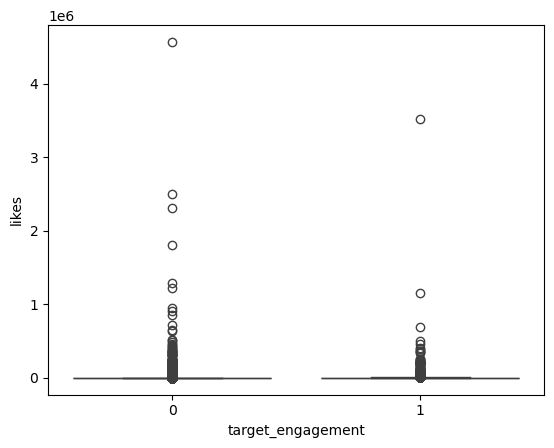

In [35]:
sns.boxplot(x='target_engagement', y='likes', data=df)

<Axes: xlabel='target_engagement', ylabel='likes'>

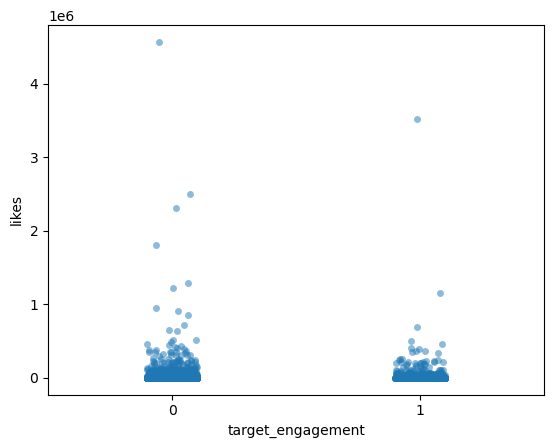

In [36]:
sns.stripplot(x="target_engagement", y="likes", data=df, jitter=True, alpha=0.5)

COMMENTS

<Axes: xlabel='mostpopular', ylabel='comments'>

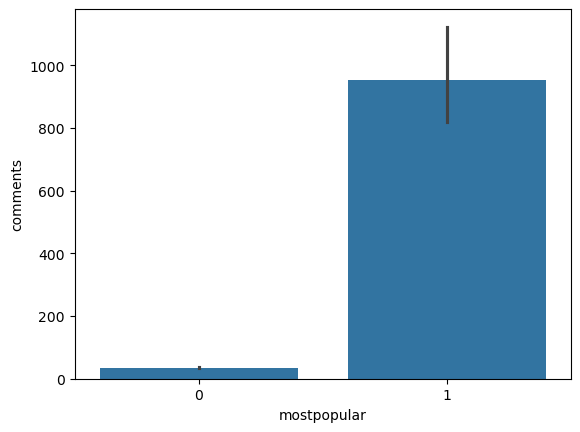

In [37]:
sns.barplot(df, x = 'mostpopular', y = 'comments')

<Axes: xlabel='mostpopular', ylabel='comments'>

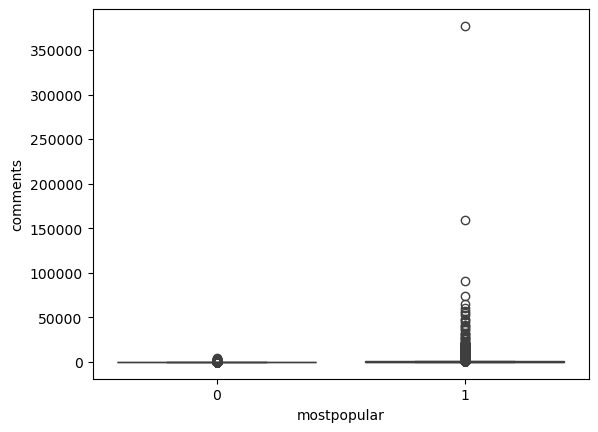

In [38]:
sns.boxplot(x='mostpopular', y='comments', data=df)

<Axes: xlabel='mostpopular', ylabel='comments'>

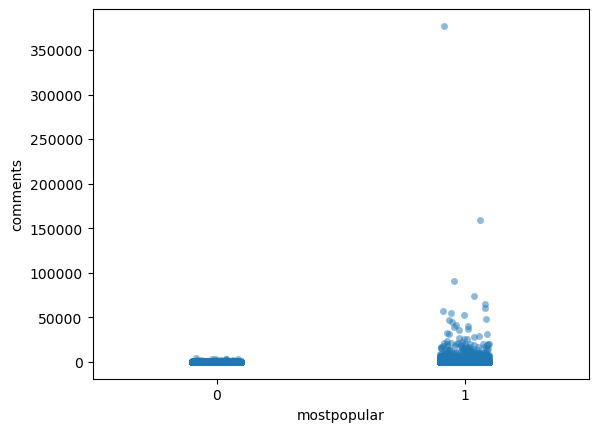

In [39]:
sns.stripplot(x="mostpopular", y="comments", data=df, jitter=True, alpha=0.5)

COMMENTS-ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='comments'>

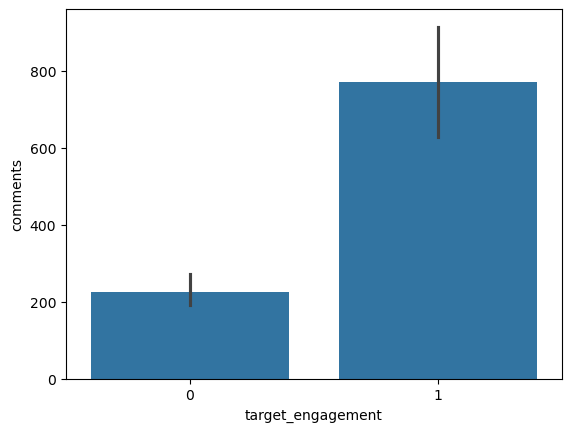

In [40]:
sns.barplot(df, x = 'target_engagement', y = 'comments')

<Axes: xlabel='target_engagement', ylabel='comments'>

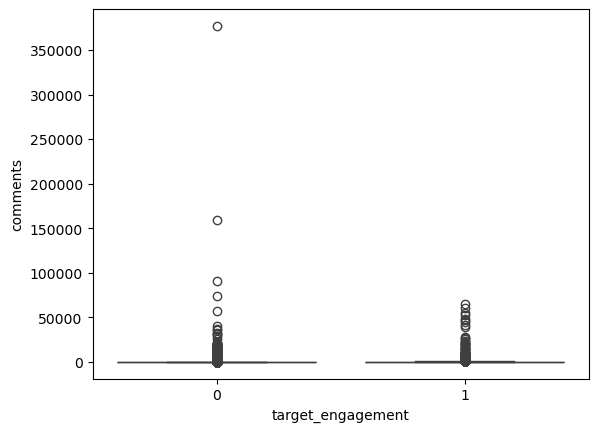

In [41]:
sns.boxplot(x='target_engagement', y='comments', data=df)

<Axes: xlabel='target_engagement', ylabel='comments'>

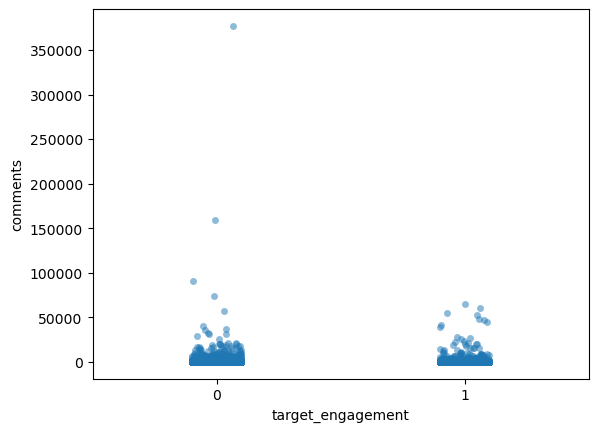

In [42]:
sns.stripplot(x="target_engagement", y="comments", data=df, jitter=True, alpha=0.5)

DURATION

<Axes: xlabel='mostpopular', ylabel='duration_minutes'>

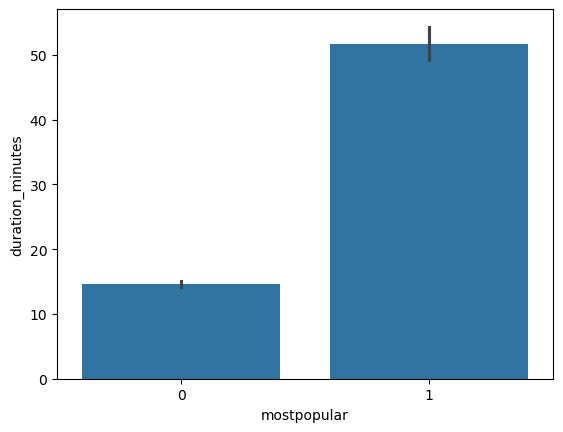

In [43]:
sns.barplot(df, x = 'mostpopular', y = 'duration_minutes')

<Axes: xlabel='mostpopular', ylabel='duration_minutes'>

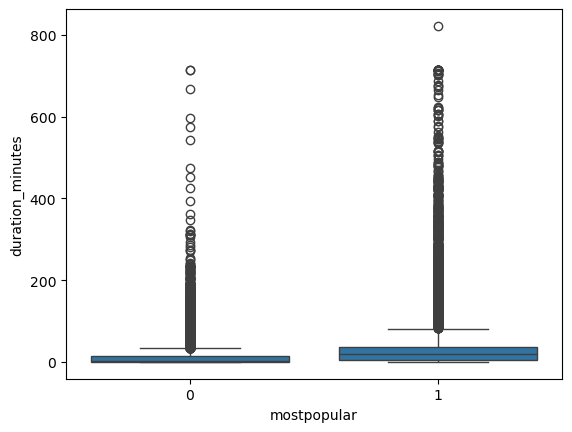

In [44]:
sns.boxplot(x='mostpopular', y='duration_minutes', data=df)

<Axes: xlabel='mostpopular', ylabel='duration_minutes'>

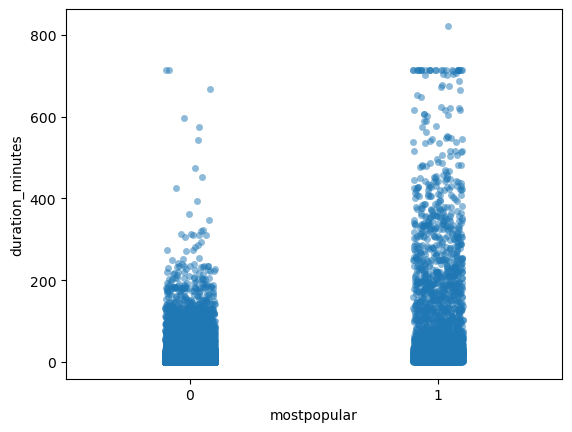

In [45]:
sns.stripplot(x="mostpopular", y="duration_minutes", data=df, jitter=True, alpha=0.5)

DURATION-ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='duration_minutes'>

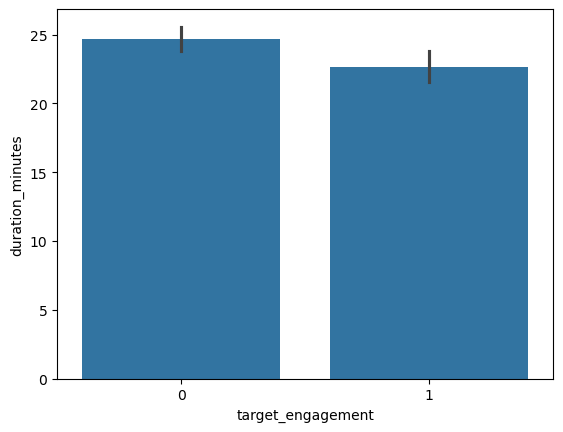

In [46]:
sns.barplot(df, x = 'target_engagement', y = 'duration_minutes')

<Axes: xlabel='target_engagement', ylabel='duration_minutes'>

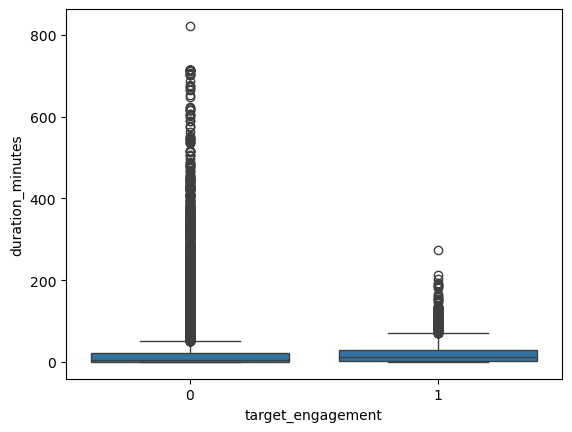

In [47]:
sns.boxplot(x='target_engagement', y='duration_minutes', data=df)

<Axes: xlabel='target_engagement', ylabel='duration_minutes'>

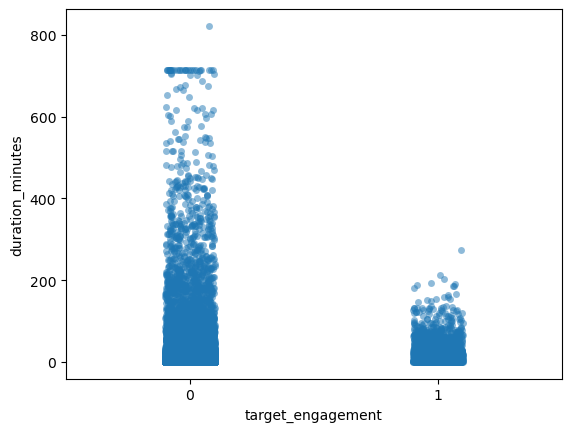

In [48]:
sns.stripplot(x="target_engagement", y="duration_minutes", data=df, jitter=True, alpha=0.5)

TAGS COUNT

<Axes: xlabel='mostpopular', ylabel='tags_count'>

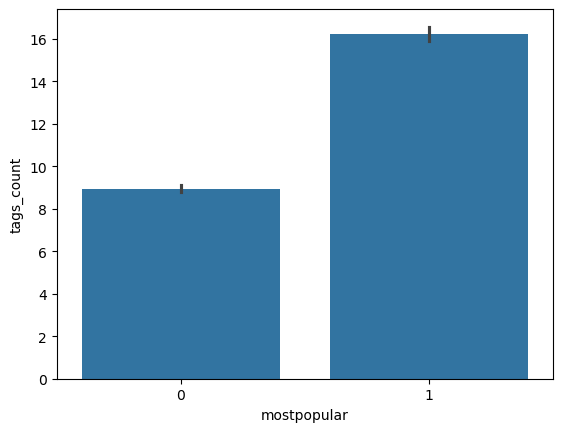

In [49]:
sns.barplot(df, x = 'mostpopular', y = 'tags_count')

<Axes: xlabel='mostpopular', ylabel='tags_count'>

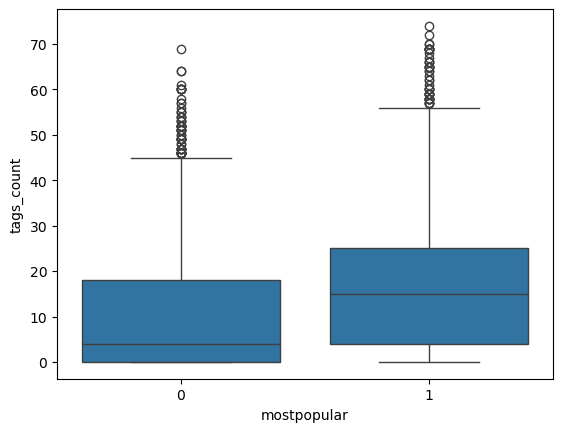

In [50]:
sns.boxplot(x='mostpopular', y='tags_count', data=df)

<Axes: xlabel='mostpopular', ylabel='tags_count'>

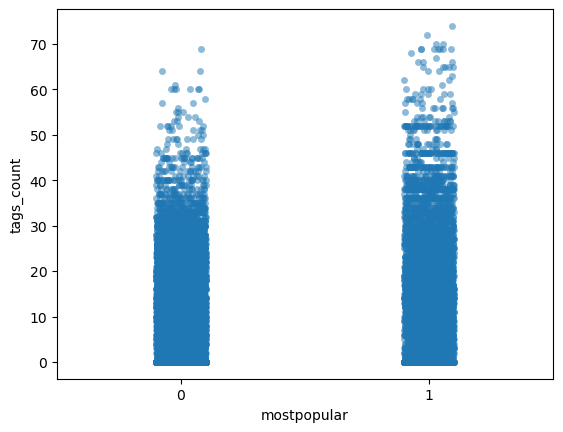

In [51]:
sns.stripplot(x="mostpopular", y="tags_count", data=df, jitter=True, alpha=0.5)

TAGS COUNT - ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='tags_count'>

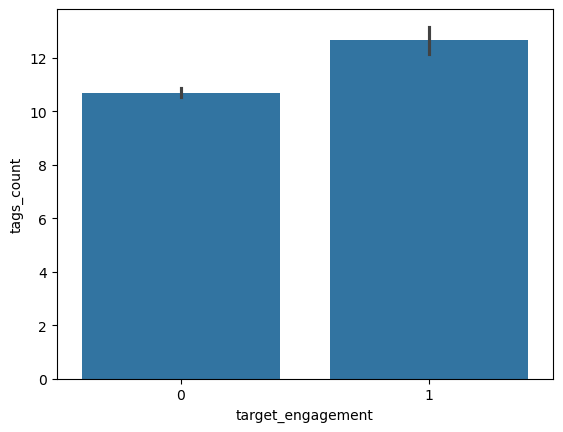

In [52]:
sns.barplot(df, x = 'target_engagement', y = 'tags_count')

<Axes: xlabel='target_engagement', ylabel='tags_count'>

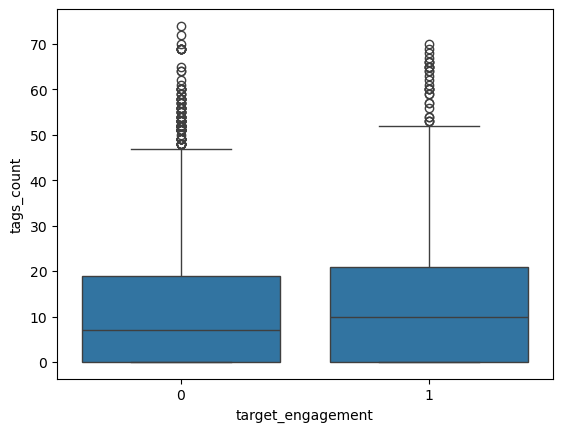

In [53]:
sns.boxplot(x='target_engagement', y='tags_count', data=df)

<Axes: xlabel='target_engagement', ylabel='tags_count'>

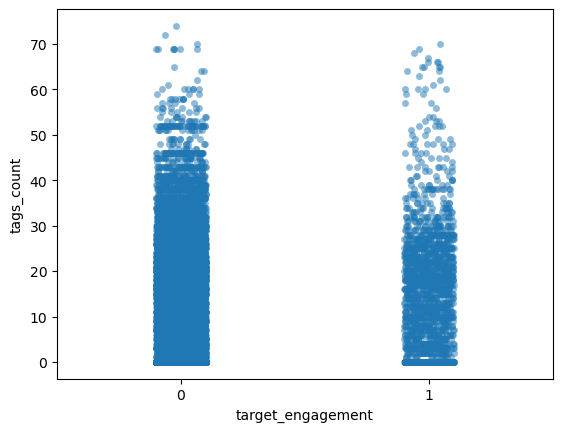

In [54]:
sns.stripplot(x="target_engagement", y="tags_count", data=df, jitter=True, alpha=0.5)

SUBSCRIBER COUNT

<Axes: xlabel='mostpopular', ylabel='subscriber_count'>

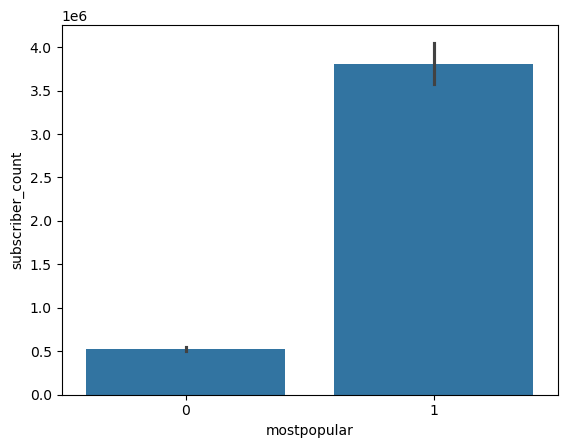

In [55]:
sns.barplot(df, x = 'mostpopular', y = 'subscriber_count')


<Axes: xlabel='mostpopular', ylabel='subscriber_count'>

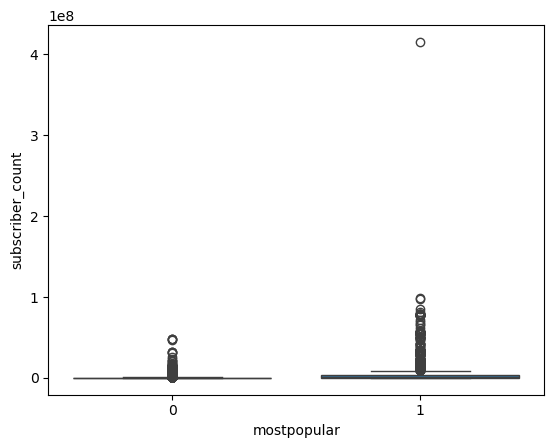

In [56]:
sns.boxplot(x='mostpopular', y='subscriber_count', data=df)


<Axes: xlabel='mostpopular', ylabel='subscriber_count'>

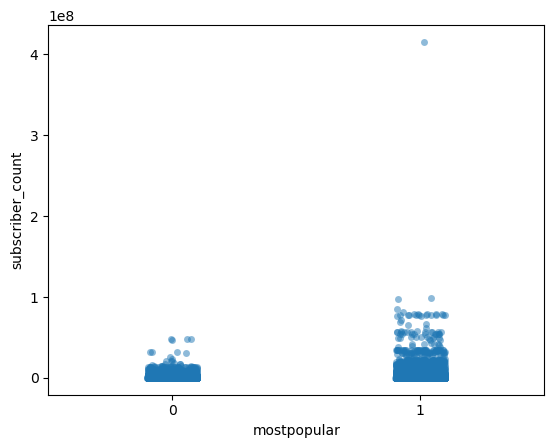

In [57]:
sns.stripplot(x="mostpopular", y="subscriber_count", data=df, jitter=True, alpha=0.5)


SUBSCRIBER COUNT- ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='subscriber_count'>

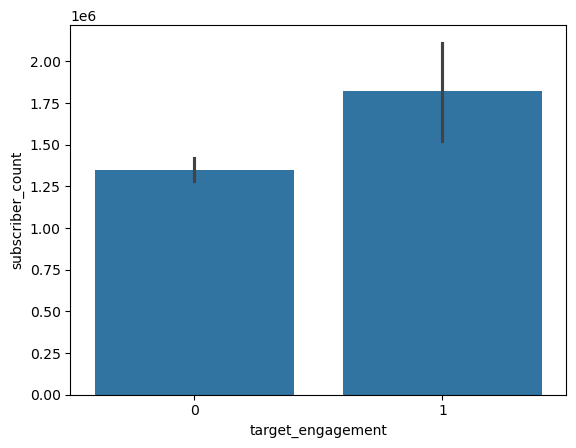

In [58]:
sns.barplot(df, x = 'target_engagement', y = 'subscriber_count')


<Axes: xlabel='target_engagement', ylabel='subscriber_count'>

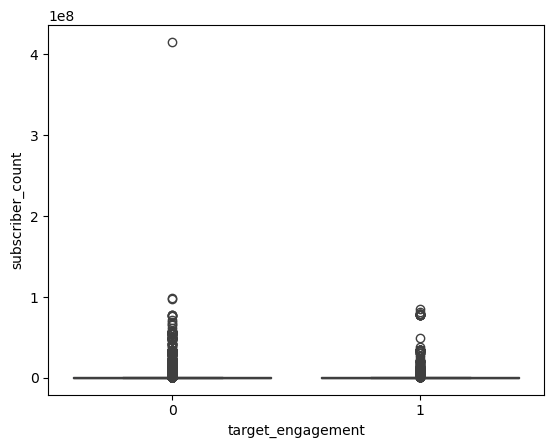

In [59]:
sns.boxplot(x='target_engagement', y='subscriber_count', data=df)


<Axes: xlabel='target_engagement', ylabel='subscriber_count'>

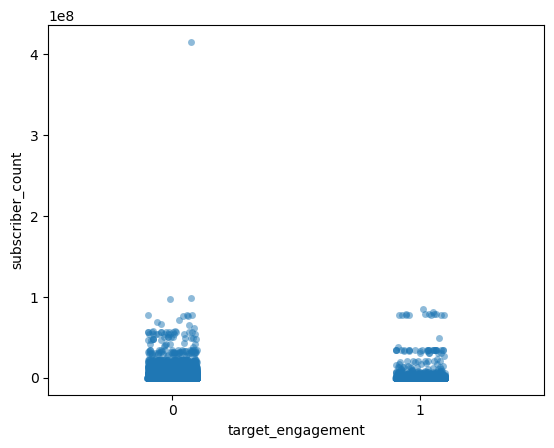

In [60]:
sns.stripplot(x="target_engagement", y="subscriber_count", data=df, jitter=True, alpha=0.5)


VIDEO AGE DAYS

<Axes: xlabel='mostpopular', ylabel='video_age_days'>

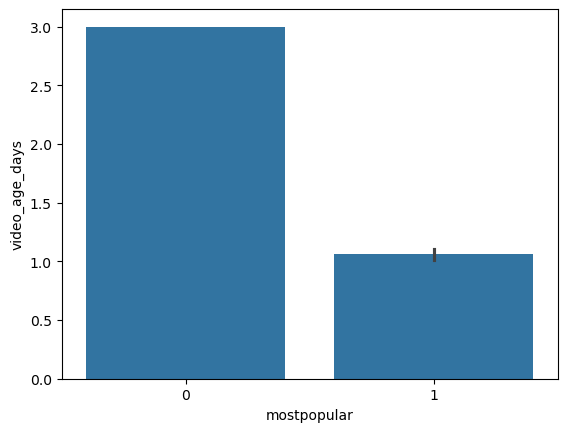

In [61]:
sns.barplot(df, x = 'mostpopular', y = 'video_age_days')


<Axes: xlabel='mostpopular', ylabel='video_age_days'>

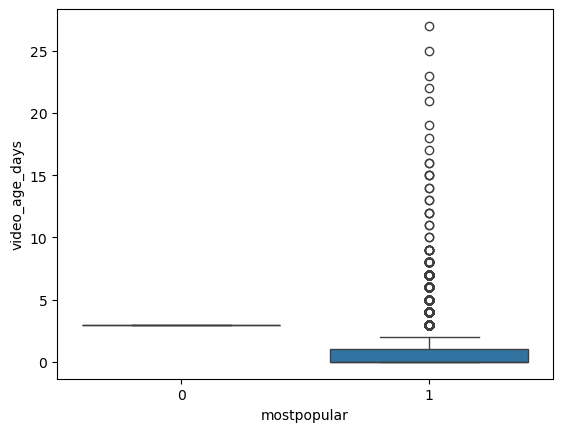

In [62]:
sns.boxplot(x='mostpopular', y='video_age_days', data=df)


<Axes: xlabel='mostpopular', ylabel='video_age_days'>

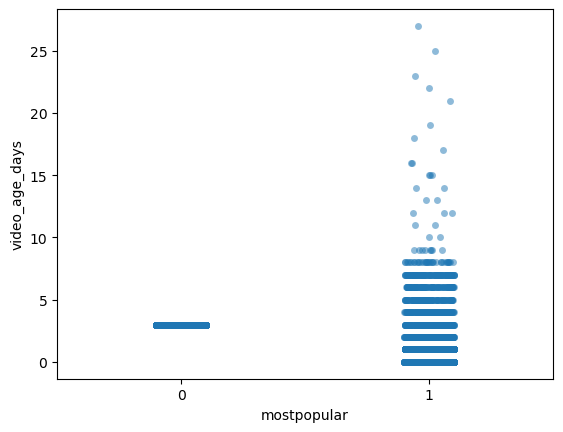

In [63]:
sns.stripplot(x="mostpopular", y="video_age_days", data=df, jitter=True, alpha=0.5)


VIDEO AGE DAYS- ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='video_age_days'>

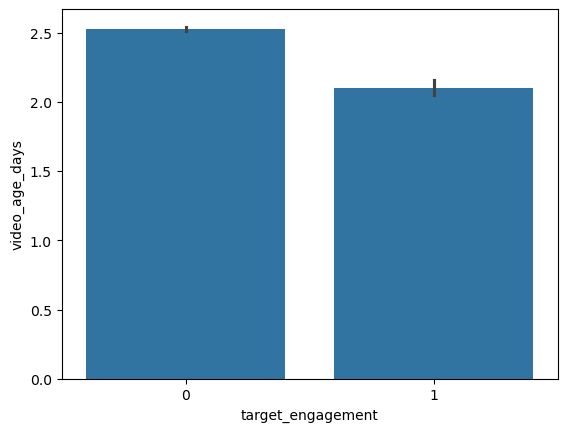

In [64]:
sns.barplot(df, x = 'target_engagement', y = 'video_age_days')


<Axes: xlabel='target_engagement', ylabel='video_age_days'>

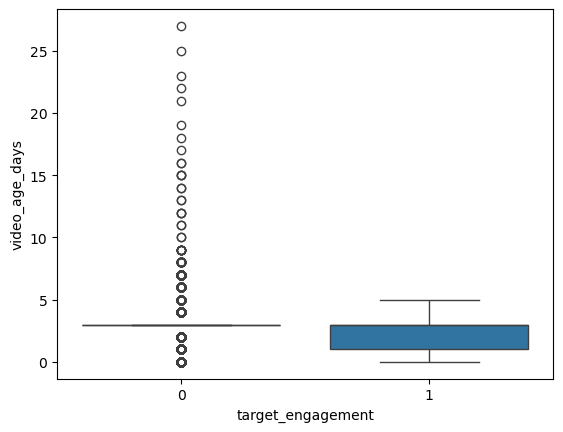

In [65]:
sns.boxplot(x='target_engagement', y='video_age_days', data=df)


<Axes: xlabel='target_engagement', ylabel='video_age_days'>

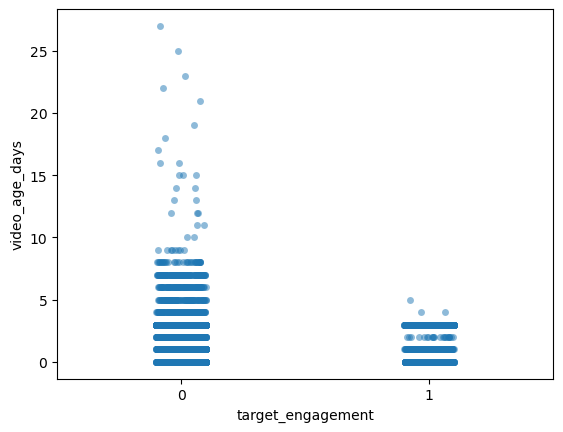

In [66]:
sns.stripplot(x="target_engagement", y="video_age_days", data=df, jitter=True, alpha=0.5)


CHANNEL VIEWS

<Axes: xlabel='mostpopular', ylabel='channel_views'>

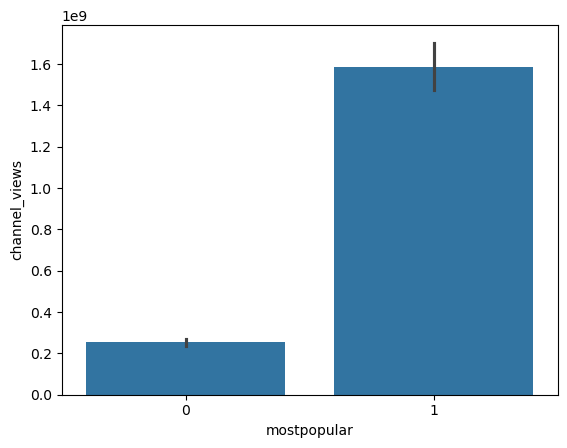

In [67]:
sns.barplot(df, x = 'mostpopular', y = 'channel_views')


<Axes: xlabel='mostpopular', ylabel='channel_views'>

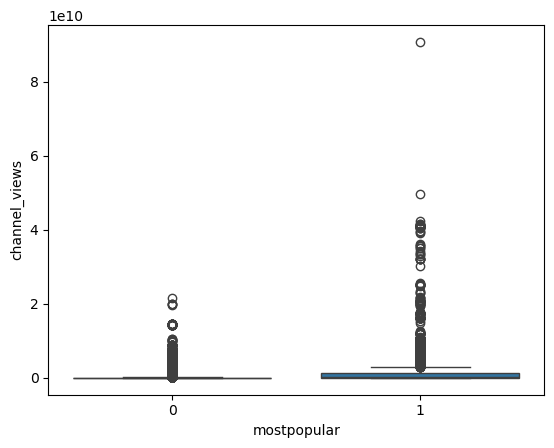

In [68]:
sns.boxplot(x='mostpopular', y='channel_views', data=df)


<Axes: xlabel='mostpopular', ylabel='channel_views'>

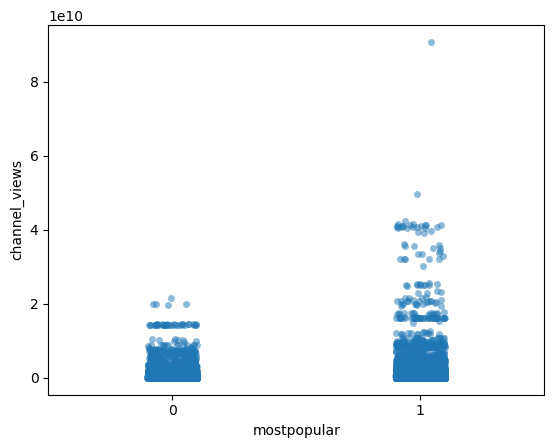

In [69]:
sns.stripplot(x="mostpopular", y="channel_views", data=df, jitter=True, alpha=0.5)


CHANNEL VIEWS- ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='channel_views'>

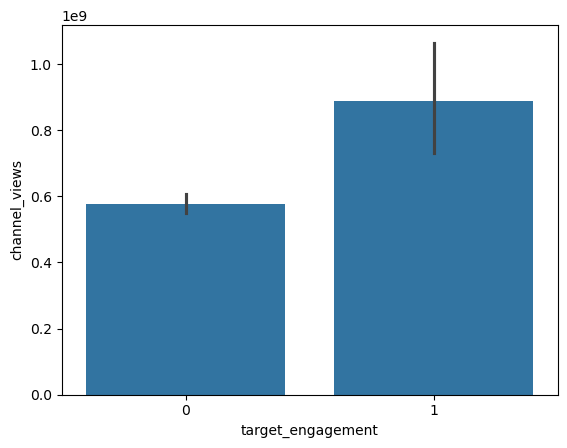

In [70]:
sns.barplot(df, x = 'target_engagement', y = 'channel_views')


<Axes: xlabel='target_engagement', ylabel='channel_views'>

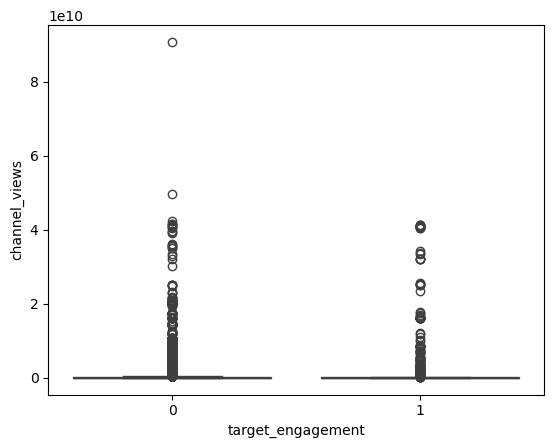

In [71]:
sns.boxplot(x='target_engagement', y='channel_views', data=df)


<Axes: xlabel='target_engagement', ylabel='channel_views'>

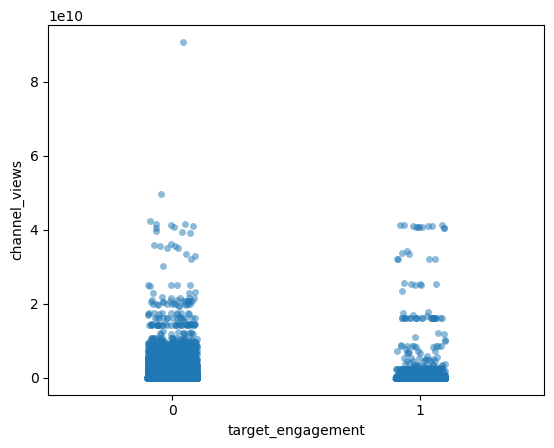

In [72]:
sns.stripplot(x="target_engagement", y="channel_views", data=df, jitter=True, alpha=0.5)


CHANNEL AGE DAYS

<Axes: xlabel='mostpopular', ylabel='channel_age_days'>

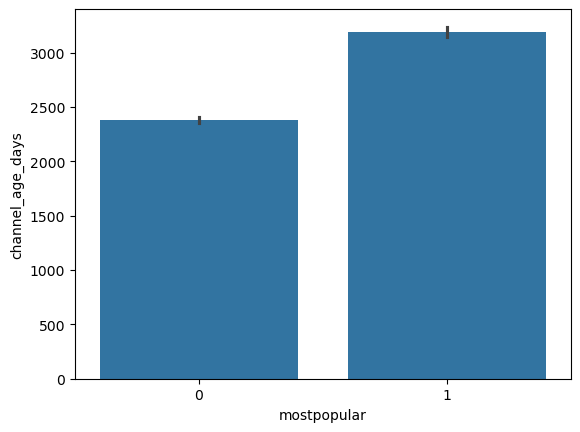

In [73]:
sns.barplot(df, x = 'mostpopular', y = 'channel_age_days')


<Axes: xlabel='mostpopular', ylabel='channel_age_days'>

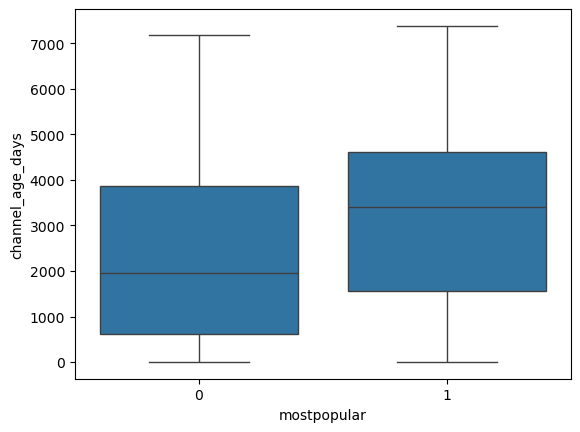

In [74]:
sns.boxplot(x='mostpopular', y='channel_age_days', data=df)


<Axes: xlabel='mostpopular', ylabel='channel_age_days'>

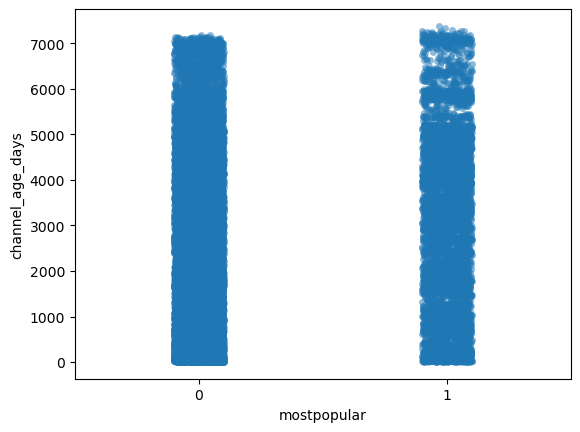

In [75]:
sns.stripplot(x="mostpopular", y="channel_age_days", data=df, jitter=True, alpha=0.5)


CHANNEL AGE DAYS- ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='channel_age_days'>

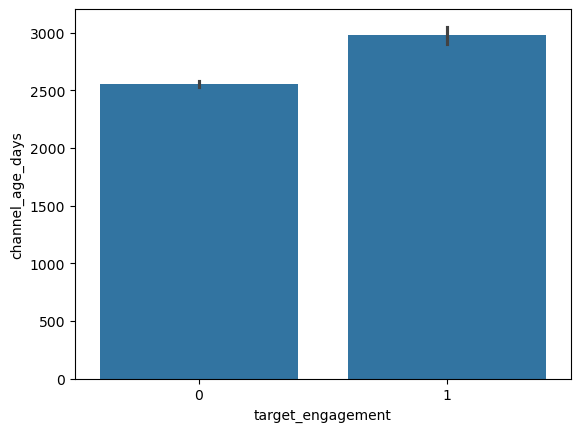

In [76]:
sns.barplot(df, x = 'target_engagement', y = 'channel_age_days')


<Axes: xlabel='target_engagement', ylabel='channel_age_days'>

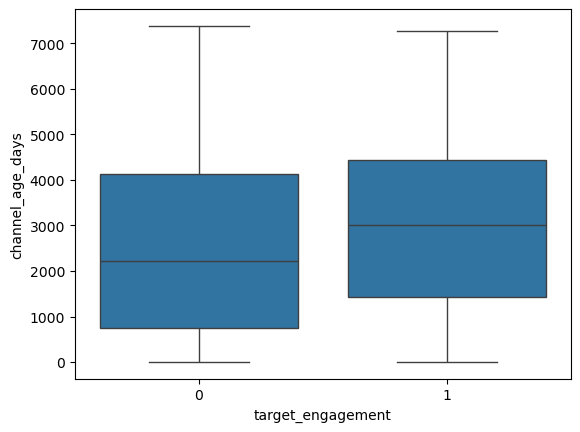

In [77]:
sns.boxplot(x='target_engagement', y='channel_age_days', data=df)


<Axes: xlabel='target_engagement', ylabel='channel_age_days'>

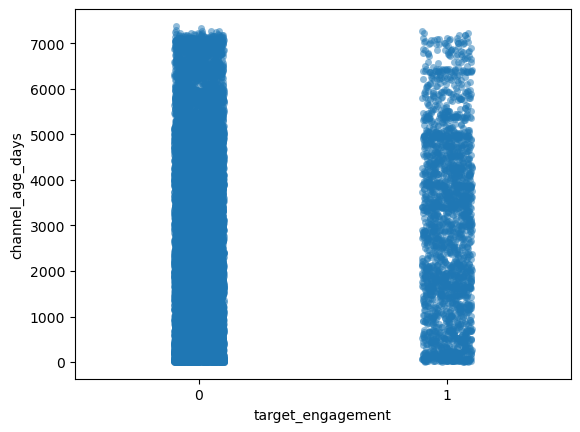

In [78]:
sns.stripplot(x="target_engagement", y="channel_age_days", data=df, jitter=True, alpha=0.5)


CHANNEL VIDEO COUNT

<Axes: xlabel='mostpopular', ylabel='channel_video_count'>

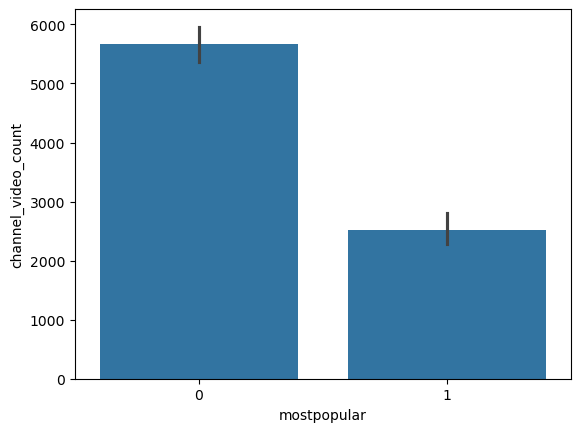

In [79]:
sns.barplot(df, x = 'mostpopular', y = 'channel_video_count')


<Axes: xlabel='mostpopular', ylabel='channel_video_count'>

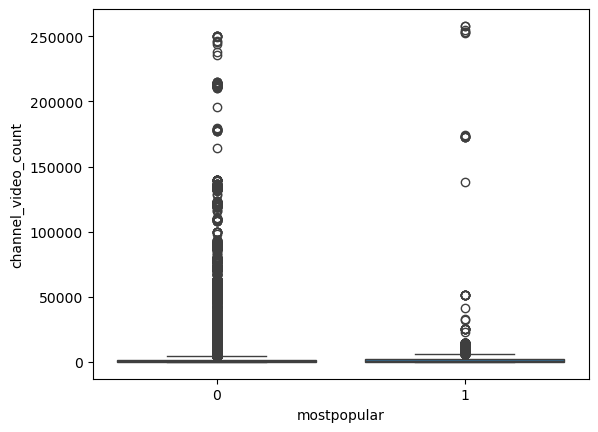

In [80]:
sns.boxplot(x='mostpopular', y='channel_video_count', data=df)


<Axes: xlabel='mostpopular', ylabel='channel_video_count'>

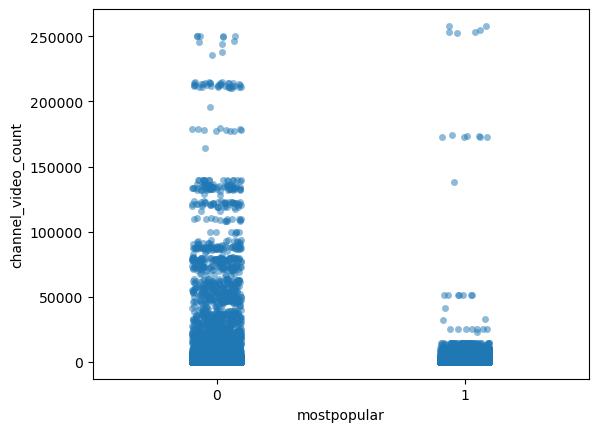

In [81]:
sns.stripplot(x="mostpopular", y="channel_video_count", data=df, jitter=True, alpha=0.5)


CHANNEL VIDEO COUNT - ENGAGEMENT

<Axes: xlabel='target_engagement', ylabel='channel_video_count'>

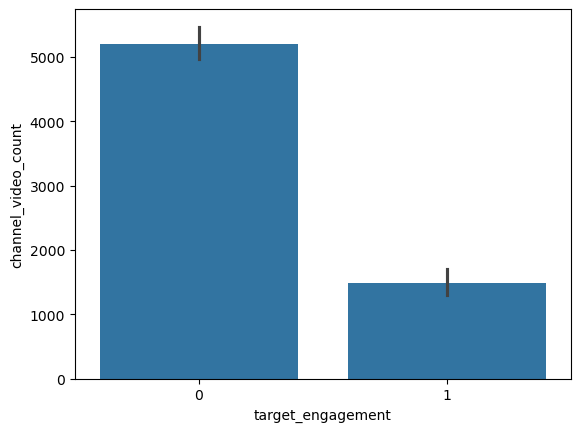

In [82]:
sns.barplot(df, x = 'target_engagement', y = 'channel_video_count')


<Axes: xlabel='target_engagement', ylabel='channel_video_count'>

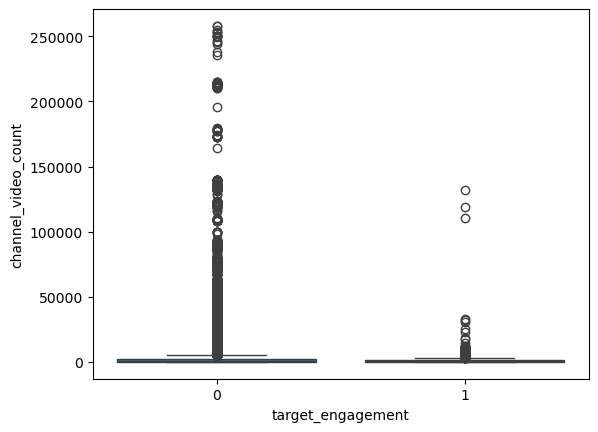

In [83]:
sns.boxplot(x='target_engagement', y='channel_video_count', data=df)


<Axes: xlabel='target_engagement', ylabel='channel_video_count'>

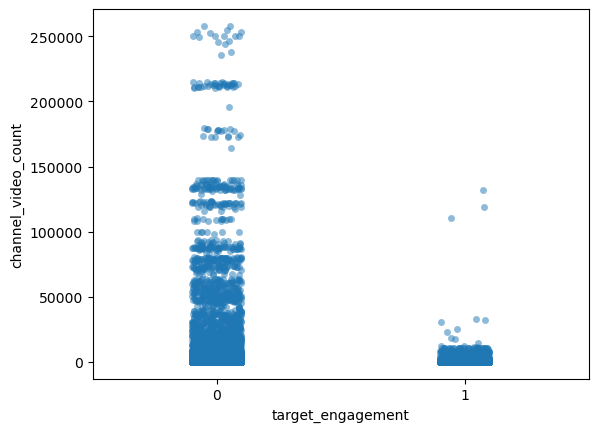

In [84]:
sns.stripplot(x="target_engagement", y="channel_video_count", data=df, jitter=True, alpha=0.5)


CORRELACION MULTIPLE

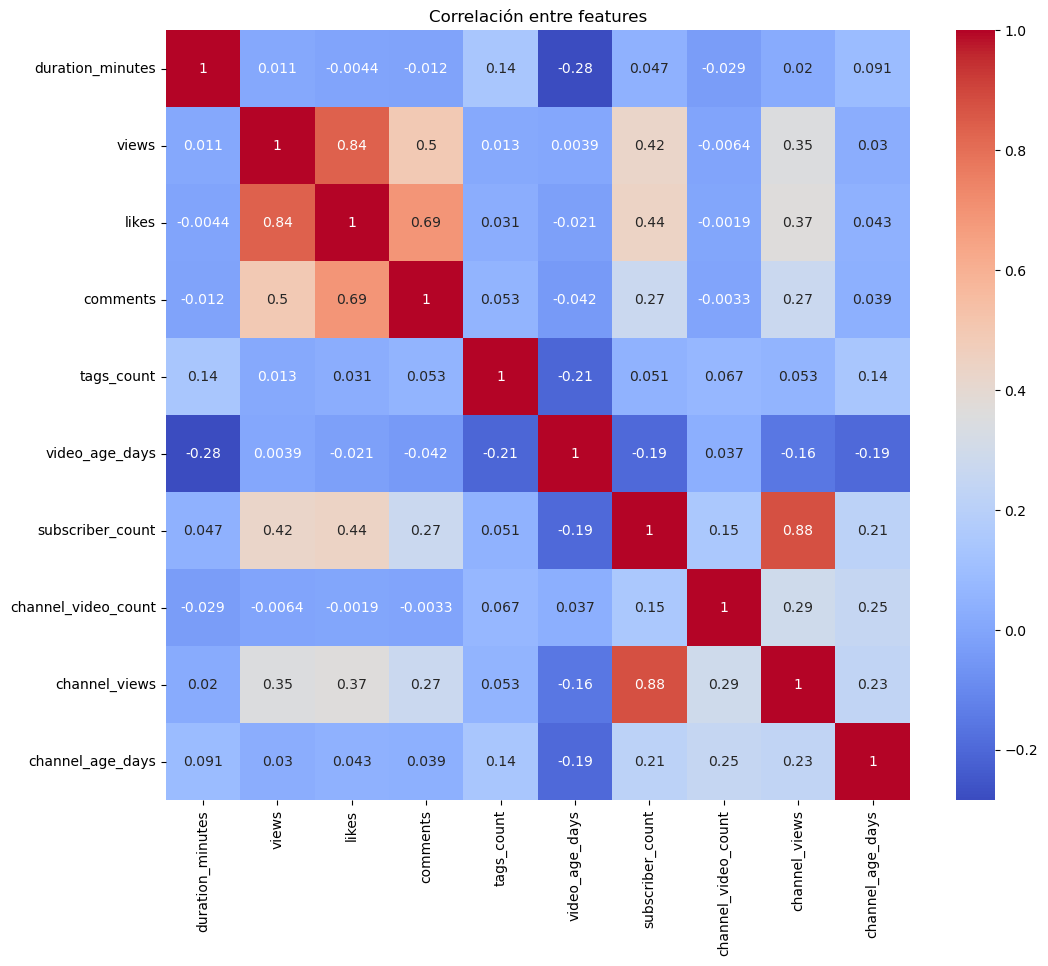

In [85]:
corr_matrix = df_EDA_numericas_bruto.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlación entre features")
plt.show()

In [86]:
df_EDA_numericas_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   duration_minutes     23248 non-null  float64
 1   views                23248 non-null  int64  
 2   likes                23248 non-null  int64  
 3   comments             23248 non-null  int64  
 4   tags_count           23248 non-null  int64  
 5   video_age_days       23248 non-null  int64  
 6   subscriber_count     23248 non-null  int64  
 7   channel_video_count  23248 non-null  int64  
 8   channel_views        23248 non-null  int64  
 9   channel_age_days     23248 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.8 MB


In [87]:
corr_matrix = df_EDA_numericas_bruto.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr_pairs = corr_matrix.where(mask).stack().reset_index()
high_corr_pairs.columns = ["var1", "var2", "correlation"]
print(high_corr_pairs)

                   var1                 var2  correlation
0      duration_minutes     duration_minutes     1.000000
1      duration_minutes                views     0.011446
2      duration_minutes                likes    -0.004377
3      duration_minutes             comments    -0.011646
4      duration_minutes           tags_count     0.138083
5      duration_minutes       video_age_days    -0.283964
6      duration_minutes     subscriber_count     0.046928
7      duration_minutes  channel_video_count    -0.029434
8      duration_minutes        channel_views     0.019832
9      duration_minutes     channel_age_days     0.090533
10                views                views     1.000000
11                views                likes     0.838334
12                views             comments     0.497773
13                views           tags_count     0.013072
14                views       video_age_days     0.003852
15                views     subscriber_count     0.424047
16            

!!!! El par subscriber_count y channel_views es de casi un 88%, lo que puede llevar a la redundancia en el modelo ML. 
Tener en cuenta que:
 -subscriber_count pone relevancia ne la fidelidad de la comunidad
-channel_views pone de relevancia el alcance histórico

En cuanto al par likes y views de un 83% de correlación, pensar que ambos dan distinta información que puede ser relevante y por tanto guardar ambos

### EDA - CATEGORIAS

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                23248 non-null  object 
 1   title                   23248 non-null  object 
 2   description             19598 non-null  object 
 3   published_at            23248 non-null  object 
 4   duration_minutes        23248 non-null  float64
 5   definition              23248 non-null  object 
 6   licensed_content        23248 non-null  bool   
 7   has_caption             23248 non-null  bool   
 8   category_id             23248 non-null  float64
 9   views                   23248 non-null  int64  
 10  likes                   23248 non-null  int64  
 11  comments                23248 non-null  int64  
 12  tags                    14451 non-null  object 
 13  tags_count              23248 non-null  int64  
 14  views_per_day           23248 non-null

DEFINICION

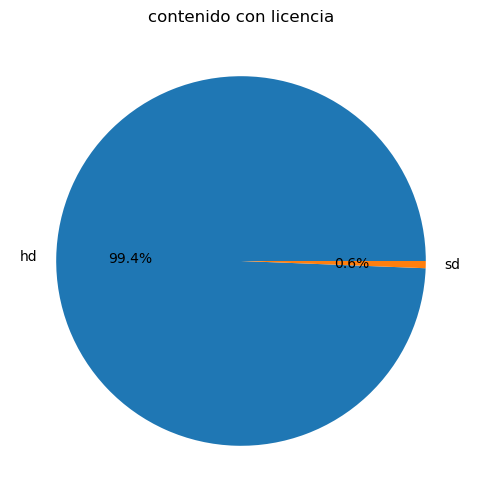

In [89]:
df['definition'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='contenido con licencia')
plt.ylabel('')  # Opcional: elimina etiqueta 'categoría'
plt.show()

In [90]:
pd.crosstab(df['definition'], df['mostpopular'], normalize='index')


mostpopular         0         1
definition                     
hd           0.732372  0.267628
sd           0.951724  0.048276

<Axes: xlabel='definition', ylabel='count'>

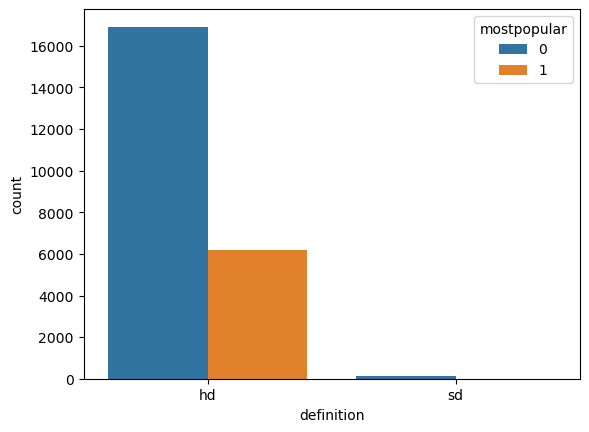

In [91]:
sns.countplot(x='definition', hue='mostpopular', data=df)

In [92]:
##DEFINICION - ENGAGEMENT
pd.crosstab(df['definition'], df['target_engagement'], normalize='index')


target_engagement         0         1
definition                           
hd                 0.900056  0.099944
sd                 0.882759  0.117241

<Axes: xlabel='definition', ylabel='count'>

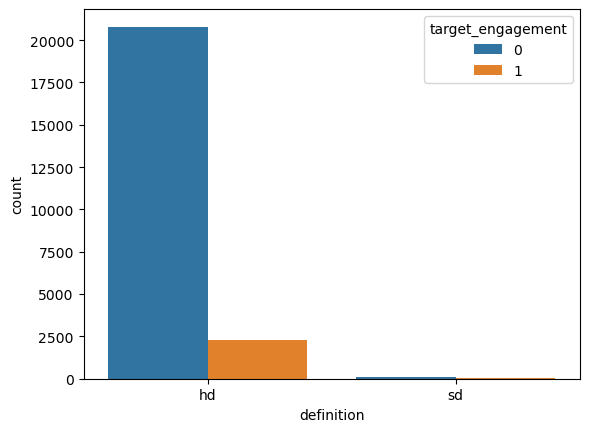

In [93]:
sns.countplot(x='definition', hue='target_engagement', data=df)

CONTENIDO CON LICENCIA

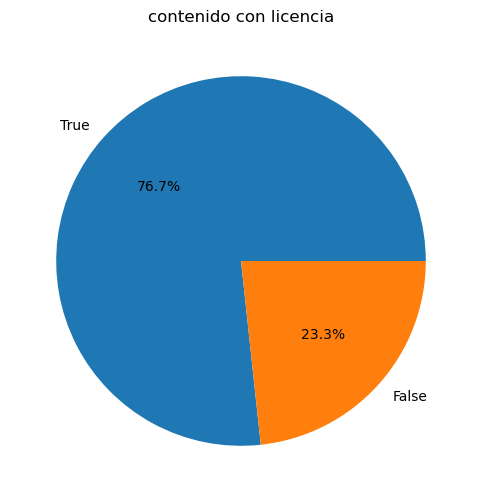

In [94]:
df['licensed_content'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='contenido con licencia')
plt.ylabel('')  # Opcional: elimina etiqueta 'categoría'
plt.show()

In [95]:
pd.crosstab(df['licensed_content'], df['mostpopular'], normalize='index')


mostpopular              0         1
licensed_content                    
False             0.921330  0.078670
True              0.676779  0.323221

<Axes: xlabel='licensed_content', ylabel='count'>

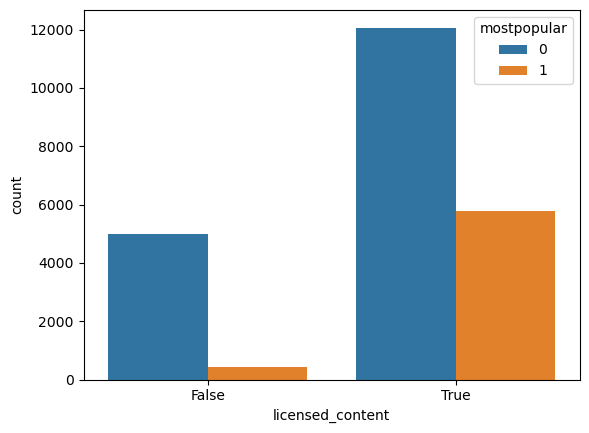

In [96]:
sns.countplot(x='licensed_content', hue='mostpopular', data=df)

In [97]:
## CONTENIDO CON LICENCIA
pd.crosstab(df['licensed_content'], df['target_engagement'], normalize='index')


target_engagement         0         1
licensed_content                     
False              0.919114  0.080886
True               0.894129  0.105871

<Axes: xlabel='licensed_content', ylabel='count'>

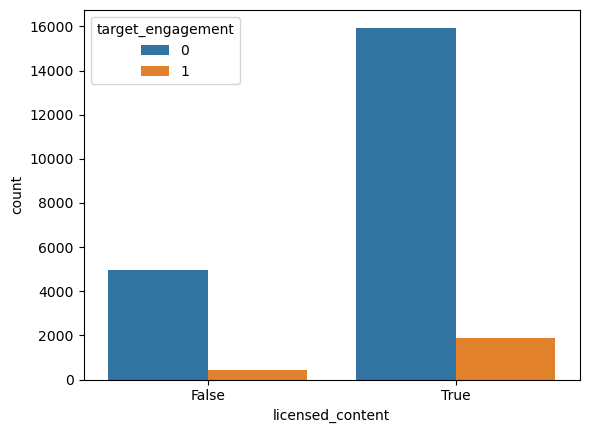

In [98]:
sns.countplot(x='licensed_content', hue='target_engagement', data=df)

TIENE CAPTACION

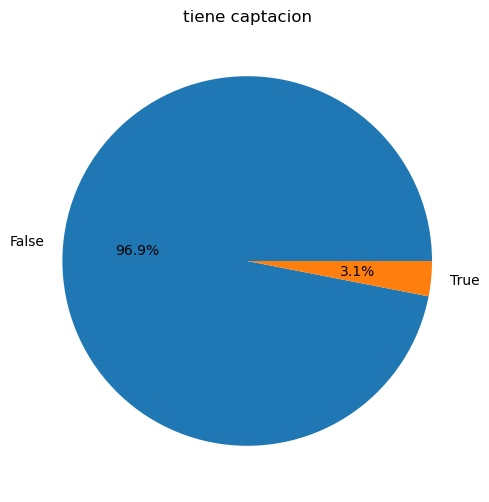

In [99]:
df['has_caption'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='tiene captacion')
plt.ylabel('')  # Opcional: elimina etiqueta 'categoría'
plt.show()

In [100]:
pd.crosstab(df['has_caption'], df['mostpopular'], normalize='index')


mostpopular         0         1
has_caption                    
False        0.737342  0.262658
True         0.619916  0.380084

<Axes: xlabel='has_caption', ylabel='count'>

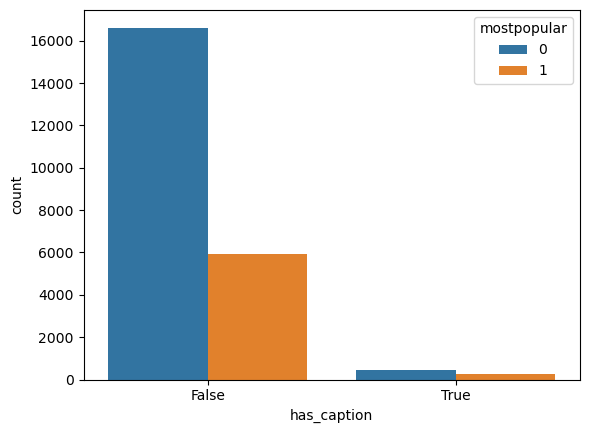

In [101]:
sns.countplot(x='has_caption', hue='mostpopular', data=df)


In [102]:
## TIENE CAPTACION
pd.crosstab(df['has_caption'], df['target_engagement'], normalize='index')


target_engagement         0         1
has_caption                          
False              0.902729  0.097271
True               0.812062  0.187938

<Axes: xlabel='has_caption', ylabel='count'>

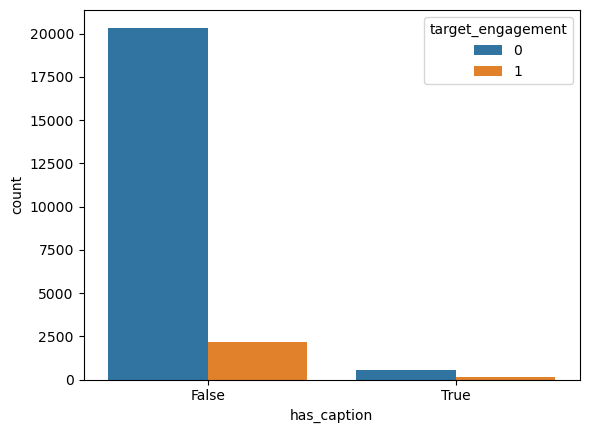

In [103]:
sns.countplot(x='has_caption', hue='target_engagement', data=df)


CATEGORIAS

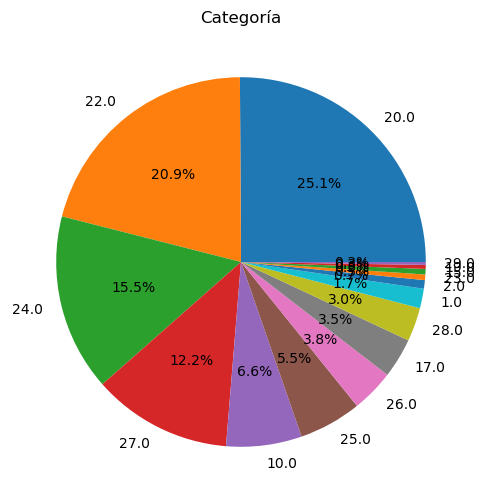

In [104]:
df['category_id'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Categoría')
plt.ylabel('')  # Opcional: elimina etiqueta 'categoría'
plt.show()

In [105]:
pd.crosstab(df['category_id'], df['mostpopular'], normalize='index')


mostpopular         0         1
category_id                    
1.0          0.732997  0.267003
2.0          0.971264  0.028736
10.0         0.214704  0.785296
15.0         0.991071  0.008929
17.0         0.913473  0.086527
19.0         1.000000  0.000000
20.0         0.322935  0.677065
22.0         0.933840  0.066160
23.0         0.902655  0.097345
24.0         0.862424  0.137576
25.0         0.998430  0.001570
26.0         0.996560  0.003440
27.0         0.997532  0.002468
28.0         0.983965  0.016035
29.0         1.000000  0.000000

<Axes: xlabel='category_id', ylabel='count'>

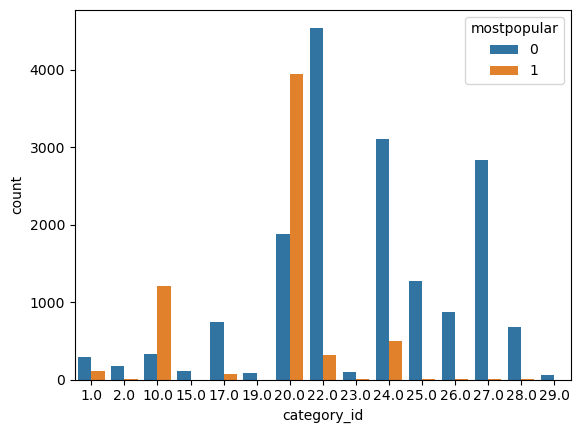

In [106]:
sns.countplot(x='category_id', hue='mostpopular', data=df)


In [107]:
##CATEGORIAS ENGAGEMENT
pd.crosstab(df['category_id'], df['target_engagement'], normalize='index')

target_engagement         0         1
category_id                          
1.0                0.836272  0.163728
2.0                0.942529  0.057471
10.0               0.757970  0.242030
15.0               0.830357  0.169643
17.0               0.960445  0.039555
19.0               0.887500  0.112500
20.0               0.912581  0.087419
22.0               0.916170  0.083830
23.0               0.920354  0.079646
24.0               0.916898  0.083102
25.0               0.957614  0.042386
26.0               0.892202  0.107798
27.0               0.867419  0.132581
28.0               0.919825  0.080175
29.0               0.762712  0.237288

<Axes: xlabel='category_id', ylabel='count'>

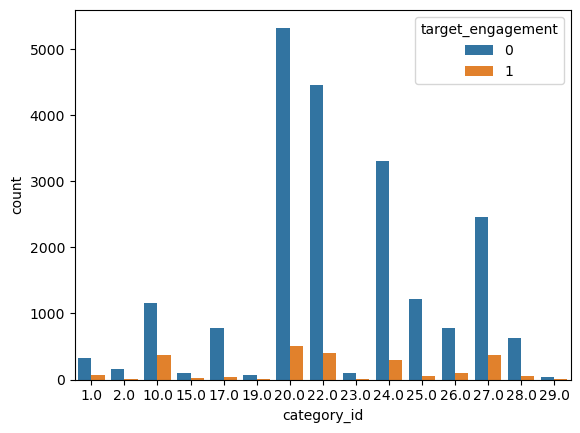

In [108]:

sns.countplot(x='category_id', hue='target_engagement', data=df)



In [109]:
def chi_square(df, target_col="mostpopular", input_cols=None, threshold=0.05):
    """
    Aplica test Chi-cuadrado entre variables categóricas y la variable target binaria.
    
    Parámetros:
    - df: DataFrame
    - target_col: columna target (por defecto 'mostpopular')
    - input_cols: lista de columnas categóricas a testear
    - threshold: nivel de significancia (por defecto 0.05)

    Retorna:
    - selected_cols: lista de variables con asociación significativa
    - statistical_significance: DataFrame con todas las variables y p-valores
    """
    statistical_significance = []

    for attr in input_cols:
        # Tabla de contingencia
        data_count = pd.crosstab(df[attr], df[target_col])
        obs = data_count.values

        # Test Chi-cuadrado
        chi2, p, dof, expected = chi2_contingency(obs)
        statistical_significance.append([attr, np.round(p, 4)])

    # Pasar a DataFrame
    statistical_significance = pd.DataFrame(statistical_significance, 
                                            columns=["Attribute", "P-value"])

    # Variables que pasan el umbral
    selected_cols = statistical_significance.loc[
        statistical_significance["P-value"] < threshold, "Attribute"
    ].tolist()

    return selected_cols, statistical_significance

In [110]:
def chi_square(df, target_col="target_engagement", input_cols=None, threshold=0.05):
    """
    Aplica test Chi-cuadrado entre variables categóricas y la variable target binaria.
    
    Parámetros:
    - df: DataFrame
    - target_col: columna target (por defecto 'mostpopular')
    - input_cols: lista de columnas categóricas a testear
    - threshold: nivel de significancia (por defecto 0.05)

    Retorna:
    - selected_cols: lista de variables con asociación significativa
    - statistical_significance: DataFrame con todas las variables y p-valores
    """
    statistical_significance = []

    for attr in input_cols:
        # Tabla de contingencia
        data_count = pd.crosstab(df[attr], df[target_col])
        obs = data_count.values

        # Test Chi-cuadrado
        chi2, p, dof, expected = chi2_contingency(obs)
        statistical_significance.append([attr, np.round(p, 4)])

    # Pasar a DataFrame
    statistical_significance = pd.DataFrame(statistical_significance, 
                                            columns=["Attribute", "P-value"])

    # Variables que pasan el umbral
    selected_cols = statistical_significance.loc[
        statistical_significance["P-value"] < threshold, "Attribute"
    ].tolist()

    return selected_cols, statistical_significance

In [111]:
categorical_vars = ["definition", "licensed_content", "has_caption", "category_id"]  
selected, results = chi_square(df, target_col="mostpopular", input_cols=categorical_vars)

print("Variables significativas:", selected)
print(results)

Variables significativas: ['definition', 'licensed_content', 'has_caption', 'category_id']
          Attribute  P-value
0        definition      0.0
1  licensed_content      0.0
2       has_caption      0.0
3       category_id      0.0


In [112]:
categorical_vars = ["definition", "licensed_content", "has_caption", "category_id"]  
selected, results = chi_square(df, target_col="target_engagement", input_cols=categorical_vars)

print("Variables significativas:", selected)
print(results)

Variables significativas: ['licensed_content', 'has_caption', 'category_id']
          Attribute  P-value
0        definition   0.5801
1  licensed_content   0.0000
2       has_caption   0.0000
3       category_id   0.0000


!!!El análisis muestra que hay una variable 'definition' que tiene significancia para explicar el comportamiento de la plataforma (mostpopular), pero no lo tiene en relación al comportamiento de los usuarios (target_engagement)

Podemos observar que las variables categóricas tienen relevancia estadística con relacion a nuestra feature meta: mostpopular.

## TRANSFORMACION DE LAS VARIABLES

-Vectorizamos los textos. 

--Dividimos en textos de videos y de canales. En videos generamos una por 'title', 'decription', y 'tags'; mientras que para los canales que creamos una para 'channel_title' y 'channel_description'.

--Empleamos OneHotEncoder para codificar las categoricas

--Estandarizamos las variable numericas

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                23248 non-null  object 
 1   title                   23248 non-null  object 
 2   description             19598 non-null  object 
 3   published_at            23248 non-null  object 
 4   duration_minutes        23248 non-null  float64
 5   definition              23248 non-null  object 
 6   licensed_content        23248 non-null  bool   
 7   has_caption             23248 non-null  bool   
 8   category_id             23248 non-null  float64
 9   views                   23248 non-null  int64  
 10  likes                   23248 non-null  int64  
 11  comments                23248 non-null  int64  
 12  tags                    14451 non-null  object 
 13  tags_count              23248 non-null  int64  
 14  views_per_day           23248 non-null

In [114]:
float64_cols=df.select_dtypes(include="float64").columns #seleccionamos columnas de tipo object

for col in float64_cols: #para cada columna
    print(col) #imprimimos nombre
    print(sorted(df[col].unique(), reverse=False))

duration_minutes
[0.05, 0.0666666666666666, 0.0833333333333333, 0.1, 0.1166666666666666, 0.1333333333333333, 0.15, 0.1666666666666666, 0.1833333333333333, 0.2, 0.2166666666666666, 0.2333333333333333, 0.25, 0.2666666666666666, 0.2833333333333333, 0.3, 0.3166666666666666, 0.3333333333333333, 0.35, 0.3666666666666666, 0.3833333333333333, 0.4, 0.4166666666666667, 0.4333333333333333, 0.45, 0.4666666666666667, 0.4833333333333333, 0.5, 0.5166666666666667, 0.5333333333333333, 0.55, 0.5666666666666667, 0.5833333333333334, 0.6, 0.6166666666666667, 0.6333333333333333, 0.65, 0.6666666666666666, 0.6833333333333333, 0.7, 0.7166666666666667, 0.7333333333333333, 0.75, 0.7666666666666667, 0.7833333333333333, 0.8, 0.8166666666666667, 0.8333333333333334, 0.85, 0.8666666666666667, 0.8833333333333333, 0.9, 0.9166666666666666, 0.9333333333333332, 0.95, 0.9666666666666668, 0.9833333333333332, 1.0, 1.0166666666666666, 1.0333333333333334, 1.05, 1.0666666666666669, 1.0833333333333333, 1.1, 1.1166666666666667, 1

In [ ]:
df['category_id']=df['category_id'].astype('category')

In [116]:
int64_columnas=df.select_dtypes(include="int64").columns #seleccionamos columnas de tipo object

for col in int64_columnas: #para cada columna
    print(col) #imprimimos nombre
    print(df[col].unique()) #imprimimos categorías

views
[33665 19332 38356 ... 35061 83462 42618]
likes
[ 3220   330  1239 ... 17075  3369  5258]
comments
[ 142   21  113 ... 4663 3789 3432]
tags_count
[ 0 31 30 14  4 17 24  5 23  3 20 13 21 26 19  6 11 22 33 10  2 25 18  1
  8 16  7 15 29  9 27 28 12 44 39 34 32 35 38 45 41 46 40 47 36 42 48 60
 55 37 43 49 69 51 64 57 50 53 61 52 56 54 58 70 59 65 62 66 63 67 72 74
 68]
video_age_days
[ 3  1  0  2  5  4  7 16  6  8 15  9 10 27 18 22 13 14 12 11 23 21 17 25
 19]
subscriber_count
[3710000  271000  115000 ...     935 7110000 7630000]
channel_video_count
[ 1498   207   726 ...  7080 25578  2847]
channel_views
[1724967670   66214214   35804779 ...  723920616  181121642  503367198]
channel_age_days
[1837 1602 4441 ... 4533 7203 3830]
mostpopular
[0 1]
target_engagement
[0 1]


In [117]:
object_columnas=df.select_dtypes(include="object").columns #seleccionamos columnas de tipo object

for col in object_columnas: #para cada columna
    print(col) #imprimimos nombre
    print(df[col].unique()) #imprimimos categorías

video_id
['VNqRXbyw6x0' '3r3GAwGndCI' 'a6mN0flleb8' ... '-UuYxszpNNE' 'kZgo-rKBQTY'
 'G7HM3uvbRLk']
title
['¿Cómo CURAR una GASTRITIS? | DrPoloGuerrero'
 'Lamine Yamal vs Como 1907 | 2 Goals (10/08/2025) - Joan Gamper Trophy'
 'Cómo Chile reinventó el Leopard 1v y así lo hizo aún mejor' ...
 'GASTÉ LA SUERTE DE MI VIDA EN ESTAS ETB DE BLACK BOLT!!'
 'SILKSONG cambia ESTO de HOLLOW KNIGHT'
 'DjMaRiiO HACE LAS MEJORES PLANTILLAS DE FC 26']
description
['ANTES DE TRATAR UNA GASTRITIS, NECESITAMOS SABER SI REALMENTE TIENES GASTRITIS! \n¿Sabías que la gastritis, si no se trata a tiempo, puede llevar a úlceras, sangrados e incluso cáncer gástrico? En este video te explico qué es la gastritis, cuáles son sus causas más comunes, los síntomas que no debes ignorar y cómo prevenir complicaciones graves. Además, hablaremos de los tratamientos basados en evidencia y de los remedios populares que podrían empeorar tu salud.\nAprende a cuidar tu estómago y evita que un problema aparentemente sencillo 

In [118]:
df_video=df[['title','description','duration_minutes','category_id', 'views', 'likes' , 'comments' , 'tags', 'tags_count', 'views_per_day','video_age_days', 'definition','licensed_content','has_caption',  'channel_id','channel_title', 'channel_description','channel_video_count', 'frecuencia_videos','channel_views', 'channel_age_days','mostpopular']]


Eliminamos estas variables para evitar colinealidad, ya que son coeficientes de datos raw y por tanto no aportan nada nuevoal modelo
	•	likes_per_view = likes / views
	•	comments_per_view = comments / views
	•	engagement_rate = (likes+comments)/views
	•	efficiency = (likes+comments)/video_count
	•	engagement_subscribers = (likes+comments)/subscriber_count
	•	views_rate_video = channel_views / video_count


!!!!! Aquí quito 'subscriber_count', mientras que dejo 'channel_views' 

!!!! Quitar 'definition' cuando use 'target_engagement'

In [119]:
# Columnas en cada dataset
cols_video = set(df_video.columns)
cols_total = set(df.columns)

# Columnas que están en ambos
comunes = cols_video & cols_total

# Columnas que están solo en df_video
solo_video = cols_video - cols_total

# Columnas que están solo en df
solo_total = cols_total - cols_video

print("Columnas comunes:", comunes)
print("Solo en df_video:", solo_video)
print("Solo en df:", solo_total)

Columnas comunes: {'has_caption', 'channel_age_days', 'video_age_days', 'channel_video_count', 'category_id', 'tags', 'channel_views', 'duration_minutes', 'tags_count', 'description', 'definition', 'comments', 'channel_title', 'views', 'likes', 'title', 'channel_description', 'frecuencia_videos', 'channel_id', 'licensed_content', 'views_per_day', 'mostpopular'}
Solo en df_video: set()
Solo en df: {'efficiency', 'channel_created', 'engagement_subscribers', 'engagement_rate', 'subscriber_count', 'comments_per_view', 'source_file', 'likes_per_view', 'published_at', 'target_engagement', 'views_rate_video', 'video_id'}


In [120]:
df_video["licensed_content"] = df_video["licensed_content"].astype(int)
df["definition"] = df["definition"].map({"sd": 0, "hd": 1}).astype(int)
df_video["has_caption"] = df_video["has_caption"].astype(int)

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_19383/616569987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video["licensed_content"] = df_video["licensed_content"].astype(int)
/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_19383/616569987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video["has_caption"] = df_video["has_caption"].astype(int)


In [121]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                23248 non-null  object  
 1   description          19598 non-null  object  
 2   duration_minutes     23248 non-null  float64 
 3   category_id          23248 non-null  category
 4   views                23248 non-null  int64   
 5   likes                23248 non-null  int64   
 6   comments             23248 non-null  int64   
 7   tags                 14451 non-null  object  
 8   tags_count           23248 non-null  int64   
 9   views_per_day        23248 non-null  float64 
 10  video_age_days       23248 non-null  int64   
 11  definition           23248 non-null  object  
 12  licensed_content     23248 non-null  int64   
 13  has_caption          23248 non-null  int64   
 14  channel_id           23248 non-null  object  
 15  channel_title      

In [122]:
df_video.isnull().sum()

title                     0
description            3650
duration_minutes          0
category_id               0
views                     0
likes                     0
comments                  0
tags                   8797
tags_count                0
views_per_day             0
video_age_days            0
definition                0
licensed_content          0
has_caption               0
channel_id                0
channel_title             0
channel_description    2143
channel_video_count       0
frecuencia_videos         0
channel_views             0
channel_age_days          0
mostpopular               0
dtype: int64

In [123]:
# 1. Preparar textos ---------------------------------------------------
df_video["text_video"] = (
    df["title"].fillna("") + " " +
    df["description"].fillna("") + " " +
    df["tags"].fillna("")
)

df_video["text_channel"] = (
    df_video["channel_title"].fillna("") + " " +
    df_video["channel_description"].fillna("")
)

# 2. Cargar modelo ligero (384 dims, rápido y gratuito) ----------------
model = SentenceTransformer("all-MiniLM-L6-v2")

# 3. Generar embeddings ------------------------------------------------
embeddings_video = model.encode(
    df_video["text_video"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True,
    batch_size=64
)

embeddings_channel = model.encode(
    df_video["text_channel"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True,
    batch_size=64
)

# 4. Guardar en el DataFrame en columnas únicas ------------------------
# 👇 Más sencillo que expandir a cientos de columnas: 
#    cada fila contiene un np.array con el embedding
df_video["embedding_video"] = list(embeddings_video)
df_video["embedding_channel"] = list(embeddings_channel)
#df_video.to_pickle("/Users/danielmunoz/Documents/EDUCACION/DATA_ANALIST/CURSOS/TFM/DATA/PROCESSED/df_video_ENGAGEMENT.pkl")


# # 5. Ejemplo de cómo obtener la matriz 2D para ML ----------------------
# # (cuando quieras entrenar, conviertes la columna en matriz NumPy)
# X_video = np.vstack(df_video["embedding_video"].values)      # shape: (n, 384)
# X_channel = np.vstack(df_video["embedding_channel"].values)  # shape: (n, 384)

# # Si quieres combinar ambas representaciones:
# X = np.hstack([X_video, X_channel])  # shape: (n, 768)

# print("Embeddings generados y listos para usar en ML.")

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_19383/1833398994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video["text_video"] = (
/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_19383/1833398994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video["text_channel"] = (


Batches:   0%|          | 0/364 [00:00<?, ?it/s]

Batches:   0%|          | 0/364 [00:00<?, ?it/s]

/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_19383/1833398994.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video["embedding_video"] = list(embeddings_video)
/var/folders/l5/hswxnhp96655ttqlpbgkrrfw0000gn/T/ipykernel_19383/1833398994.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_video["embedding_channel"] = list(embeddings_channel)


In [124]:
#### Posibilidad de concatenar los resultados
# emb_df_video   = pd.DataFrame(embeddings_video).add_prefix("video_emb_")
# emb_df_channel = pd.DataFrame(embeddings_channel).add_prefix("channel_emb_")
# df = pd.concat([df, emb_df_video, emb_df_channel], axis=1)  # ya “abierto”
# X = df.filter(regex=r"^(video_emb_|channel_emb_)").values   # (n, 768)

In [128]:
# Copia de seguridad antes de limpiar (opcional)
#df_video_textbackup = df_video[["title", "description", "tags", "channel_title", "channel_description"]].copy()

# Eliminar columnas de texto ya vectorizadas y tambien aquellas que no necesitamos
df_video = df_video.drop(
    columns=[ "text_video","text_channel","definition","engagement_rate",'duration_minutes','category_id', 'tags_count','licensed_content', 'has_caption',
             "title","channel_id","description","tags","views", "comments","likes",
             "channel_title","channel_description", 'views_per_day','video_age_days','channel_video_count','channel_views','channel_age_days','frecuencia_videos',],
    errors="ignore"
)


In [129]:
X = df_video.drop(columns=["mostpopular"])
y = df_video["mostpopular"]

In [130]:
list(X.columns)             # lo mismo, pero como lista de Python

['embedding_video', 'embedding_channel']

In [131]:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
for col_to_drop in ['embedding_video','embedding_channel']:
    if col_to_drop in cat_cols:
        cat_cols.remove(col_to_drop)

# asegurar category_id como string en categóricas
if 'category_id' in X.columns and 'category_id' not in cat_cols:
    X['category_id'] = X['category_id'].astype(str)
    cat_cols.append('category_id')

# ==== 2) Transformer para embeddings (sin lambdas; picklable) ====
class EmbeddingStacker(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): 
        return self
    def transform(self, X):
        col = X.iloc[:, 0] if isinstance(X, pd.DataFrame) else np.ravel(X)
        return np.vstack(col)

# ==== 3) Preprocessor ====
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(method='yeo-johnson', standardize=True), num_cols),
        # si tu scikit-learn < 1.2 usa: sparse=False
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('emb_video',   EmbeddingStacker(), ['embedding_video']),
        ('emb_channel', EmbeddingStacker(), ['embedding_channel']),
    ],
    remainder='drop'
)

# ==== 4) Pipeline con modelo ====
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# ==== 5) Train / Test split ====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# ==== 6) Entrenar ====
pipe.fit(X_train, y_train)

# ==== 7) Evaluar ====
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

ROC AUC: 0.987434588935374
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3412
           1       0.90      0.92      0.91      1238

    accuracy                           0.95      4650
   macro avg       0.94      0.94      0.94      4650
weighted avg       0.95      0.95      0.95      4650

Matriz de confusión:
 [[3286  126]
 [  98 1140]]


In [128]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   duration_minutes   23248 non-null  float64 
 1   category_id        23248 non-null  category
 2   tags_count         23248 non-null  int64   
 3   licensed_content   23248 non-null  int64   
 4   has_caption        23248 non-null  int64   
 5   frecuencia_videos  23248 non-null  float64 
 6   channel_age_days   23248 non-null  int64   
 7   mostpopular        23248 non-null  int64   
 8   embedding_video    23248 non-null  object  
 9   embedding_channel  23248 non-null  object  
dtypes: category(1), float64(2), int64(5), object(2)
memory usage: 1.6+ MB


In [130]:
# ============================
# COMPARAR X_full vs X_reduced
# ============================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# ---------- 1) Construir X_full y X_reduced ----------
# y: elige tu target real (p.ej., 'target_engagement' o 'mostpopular')
#    IMPORTANTE: si 'mostpopular' está en X, la quitamos para evitar fuga.
target_col = 'mostpopular'  # <-- ajusta si tu target es otra
assert target_col in df_video.columns, f"No encuentro la target '{target_col}' en df_video.columns"

# X_full: usa exactamente tus columnas listadas (excepto la target)
X_full = df_video[['duration_minutes','category_id','comments',
                   'tags_count','views_per_day','video_age_days','licensed_content',
                   'has_caption','channel_video_count','frecuencia_videos',
                   'channel_views','channel_age_days', #,'mostpopular', # ojo, luego se quita
                   'embedding_video','embedding_channel']].copy()

y = df_video[target_col].copy()

# Eliminar cualquier target colada en X
for tcol in [target_col, 'mostpopular']:
    if tcol in X_full.columns:
        X_full = X_full.drop(columns=tcol)

# X_reduced: quita señales potencialmente triviales/redundantes
cols_remove = ['views','likes','comments','channel_views']  # sospechosas/colineales
X_reduced = X_full.drop(columns=[c for c in cols_remove if c in X_full.columns], errors='ignore').copy()

print("X_full cols:", list(X_full.columns))
print("X_reduced cols:", list(X_reduced.columns))

# ---------- 2) Helper: preprocessor robusto ----------
class EmbeddingStacker(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): 
        return self
    def transform(self, X):
        col = X.iloc[:, 0] if isinstance(X, pd.DataFrame) else np.ravel(X)
        return np.vstack(col)

def build_preprocessor(X):
    # numéricas
    num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
    # categóricas (excluir embeds y textos)
    cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()
    for col_to_drop in ['embedding_video','embedding_channel','text_video','text_channel']:
        if col_to_drop in cat_cols:
            cat_cols.remove(col_to_drop)
    # asegurar category_id como string si existe
    if 'category_id' in X.columns and 'category_id' not in cat_cols:
        X['category_id'] = X['category_id'].astype(str)
        cat_cols.append('category_id')

    # Compat OneHotEncoder: usa sparse_output si tu sklearn >=1.2; de lo contrario usa sparse
    try:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', PowerTransformer(method='yeo-johnson', standardize=True), num_cols),
            ('cat', ohe, cat_cols),
            ('emb_video',   EmbeddingStacker(), ['embedding_video']) if 'embedding_video' in X.columns else ('emb_video', 'drop', []),
            ('emb_channel', EmbeddingStacker(), ['embedding_channel']) if 'embedding_channel' in X.columns else ('emb_channel', 'drop', []),
        ],
        remainder='drop'
    )
    return preprocessor

# ---------- 3) Helper: entrenar y evaluar ----------
def train_and_eval(X, y, name="set"):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=42
    )
    preprocessor = build_preprocessor(X)
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model', LogisticRegression(max_iter=1000))
    ])
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]

    auc = roc_auc_score(y_test, y_proba)
    cm  = confusion_matrix(y_test, y_pred)
    print(f"\n=== Resultados {name} ===")
    print("ROC AUC:", round(auc, 6))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión:\n", cm)
    return {'pipe': pipe, 'auc': auc, 'cm': cm}

# ---------- 4) Comparación ----------
res_full    = train_and_eval(X_full,    y, name="X_full")
res_reduced = train_and_eval(X_reduced, y, name="X_reduced")

print("\nComparativa AUC ->  X_full:", round(res_full['auc'],6), " | X_reduced:", round(res_reduced['auc'],6))

KeyError: "['comments'] not in index"

In [ ]:
# Variante sin embeddings (solo num+cat)
cols_no_emb = [c for c in X_full.columns if c not in ['embedding_video','embedding_channel']]
X_no_emb = X_full[cols_no_emb].copy()

res_no_emb = train_and_eval(X_no_emb, y, name="X_sin_embeddings")

print("\nComparativa AUC ->",
      "X_full:", round(res_full['auc'],6),
      "| X_reduced:", round(res_reduced['auc'],6),
      "| X_sin_embeddings:", round(res_no_emb['auc'],6))


=== Resultados X_sin_embeddings ===
ROC AUC: 0.996036
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3412
           1       0.98      0.96      0.97      1238

    accuracy                           0.98      4650
   macro avg       0.98      0.97      0.98      4650
weighted avg       0.98      0.98      0.98      4650

Matriz de confusión:
 [[3387   25]
 [  53 1185]]

Comparativa AUC -> X_full: 0.998782 | X_reduced: 0.998771 | X_sin_embeddings: 0.996036


In [ ]:
if 'category_id' in X.columns and 'category_id' not in cat_cols:
    X = X.copy()  # evita SettingWithCopyWarning
    X.loc[:, 'category_id'] = X['category_id'].astype(str)
    cat_cols.append('category_id')

In [ ]:
from sklearn.metrics import roc_curve, auc as sk_auc
import matplotlib.pyplot as plt

def train_and_eval(X, y, name="set"):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=42
    )
    preprocessor = build_preprocessor(X)
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model', LogisticRegression(max_iter=1000))
    ])
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_val = sk_auc(fpr, tpr)
    cm  = confusion_matrix(y_test, y_pred)

    print(f"\n=== Resultados {name} ===")
    print("ROC AUC:", round(auc_val, 6))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusión:\n", cm)

    # Curva ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc_val:.3f})')
    plt.plot([0,1],[0,1],'--')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC - {name}')
    plt.legend(); plt.show()

    return {'pipe': pipe, 'auc': auc_val, 'cm': cm, 'fpr': fpr, 'tpr': tpr}


NameError: name 'name' is not defined

In [ ]:

knn = KNeighborsClassifier(n_neighbors=20, weights="distance", n_jobs=-3)
os.environ["TOKENIZERS_PARALLELISM"] = "false"
pipeline_power = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', knn)
])

pipeline_power.fit(X_train, y_train)
y_pred = pipeline_power.predict(X_test)
# Si necesitas probabilidades:
y_proba = pipeline_power.predict_proba(X_test)

In [ ]:
t0 = time.time()
pipeline_power.fit(X_train, y_train)
print(f"FIT listo en {time.time()-t0:.2f}s")

t0 = time.time()
y_pred  = pipeline_power.predict(X_test)
print(f"PRED listo en {time.time()-t0:.2f}s")

y_proba = pipeline_power.predict_proba(X_test)  # (n, 2) si es binario

print("Primeras 10 predicciones:", y_pred[:10])
print("Primeras 5 probabilidades:", y_proba[:5])

# Métricas (binario; clase positiva = 1)
auc = roc_auc_score(y_test, y_proba[:, 1])
print("ROC AUC:", auc)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))




FIT listo en 0.16s
PRED listo en 0.90s
Primeras 10 predicciones: [0 0 0 0 0 0 0 0 0 0]
Primeras 5 probabilidades: [[0.95489872 0.04510128]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
ROC AUC: 0.9017062987371693
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4185
           1       0.72      0.25      0.37       465

    accuracy                           0.92      4650
   macro avg       0.82      0.62      0.66      4650
weighted avg       0.90      0.92      0.90      4650

Matriz de confusión:
 [[4139   46]
 [ 348  117]]


###  1 Hacer el OneHotEncoder dentro del pipeline y no antes 2 Coger las variables correlacionadas y eliminar las que están en bruto

In [ ]:
logreg = LogisticRegression(max_iter=1000, class_weight="balanced")
pipeline_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('model', logreg)
])
pipeline_lr.fit(X_train, y_train)
print("AUC:", roc_auc_score(y_test, pipeline_lr.predict_proba(X_test)[:,1]))

AUC: 0.9950118831978007


In [ ]:
y_pred = pipeline_lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4185
           1       0.69      0.98      0.81       465

    accuracy                           0.96      4650
   macro avg       0.85      0.97      0.89      4650
weighted avg       0.97      0.96      0.96      4650

[[3984  201]
 [   8  457]]


# 1.2 Creación de dataset para Canales

In [ ]:
# duplicados = df[df["channel_id"].duplicated(keep=False)].sort_values("channel_id")
# df_preparacion_canal = df.drop_duplicates(subset="channel_id", keep="last")
# df_preparacion_canal["mostpopular"].value_counts(normalize=True)
# df_preparacion_canal.info()

# # EN función de mis objetivos la selección que voy a hacer para la configuración del dataset 

# def _safe_div(num, den):
#     """División segura: si el denominador es 0 o NaN, devuelve 0."""
#     num = num.astype(float)
#     den = den.astype(float)
#     out = np.divide(num, den, out=np.zeros_like(num, dtype=float), where=(den!=0) & (~np.isnan(den)))
#     return out

# def build_channel_datasets(df: pd.DataFrame):
#     """
#     Construye distintos datasets a nivel canal a partir de un DataFrame a nivel vídeo (df).
#     Requisitos habituales en df:
#       - 'channel_id' (str)
#       - 'channel_views', 'subscriber_count', 'channel_video_count', 'channel_age_days' (numéricos)
#       - Métricas por vídeo: 'views', 'likes', 'comments', 'engagement_rate' (si existe)
#       - Target por vídeo (opcional): 'mostpopular' (0/1)
#     """

#     # -------- 1) Variables CRUDAS (totales del canal) --------
#     # Tomamos el último valor observado por canal (suele ser consistente para totales del canal)
#     crudos = (
#         df.sort_values("channel_age_days", na_position="first")
#           .groupby("channel_id", as_index=False)
#           .agg({
#               "channel_views": "last",
#               "subscriber_count": "last",
#               "channel_video_count": "last",
#               "channel_age_days": "last"
#           })
#     )
#     crudos = crudos.rename(columns={
#         "channel_views": "channel_views_total",
#         "subscriber_count": "subscriber_count_total",
#         "channel_video_count": "channel_video_count_total",
#         "channel_age_days": "channel_age_days_total"
#     })

#     # -------- 2) RATIOS normalizados a nivel canal --------
#     ratios = crudos.copy()
#     ratios["views_per_video"] = _safe_div(
#         ratios["channel_views_total"], ratios["channel_video_count_total"]
#     )
#     ratios["subs_per_video"] = _safe_div(
#         ratios["subscriber_count_total"], ratios["channel_video_count_total"]
#     )
#     ratios["views_per_day"] = _safe_div(
#         ratios["channel_views_total"], ratios["channel_age_days_total"]
#     )
#     ratios["pub_freq_per_day"] = _safe_div(
#         ratios["channel_video_count_total"], ratios["channel_age_days_total"]
#     )

#     # -------- 3) PROMEDIOS/ESTADÍSTICOS de métricas de vídeo --------
#     # Calculamos medias/medianas por canal de métricas a nivel vídeo (si existen)
#     agg_dict = {}
#     for col in ["views", "likes", "comments", "engagement_rate"]:
#         if col in df.columns:
#             agg_dict[col] = ["mean", "median"]

#     promedios = pd.DataFrame({"channel_id": df["channel_id"].unique()})
#     if agg_dict:
#         prom = df.groupby("channel_id").agg(agg_dict)
#         # Aplana columnas multiíndice: p.ej. ('views','mean') -> 'views_mean'
#         prom.columns = [f"{a}_{b}" for a, b in prom.columns]
#         prom = prom.reset_index()
#         promedios = prom
#     # Si no hay ninguna de esas columnas, 'promedios' quedará solo con channel_id.

#     # -------- 4) TARGETS derivados a nivel canal --------
#     # has_trending: 1 si algún vídeo del canal fue mostpopular==1
#     # prop_trending: proporción de vídeos trending del canal
#     # n_videos: número de vídeos del canal presentes en df
#     targets = df.groupby("channel_id").agg(n_videos=("video_id", "count") if "video_id" in df.columns else ("channel_id","count"))
#     if "mostpopular" in df.columns:
#         # Acepta valores 0/1; si hay NaN, los tratamos como 0
#         tmp = df[["channel_id", "mostpopular"]].copy()
#         tmp["mostpopular"] = tmp["mostpopular"].fillna(0).astype(int)
#         t2 = tmp.groupby("channel_id")["mostpopular"].agg(
#             has_trending=lambda s: int(s.max()),
#             prop_trending=lambda s: float(s.mean())
#         )
#         targets = targets.join(t2, how="left")
#     else:
#         targets["has_trending"] = np.nan
#         targets["prop_trending"] = np.nan
#     targets = targets.reset_index()

#     # -------- Merge de vistas útiles --------
#     # crudos + ratios + promedios + targets
#     canal_full = (
#         crudos
#         .merge(ratios[["channel_id","views_per_video","subs_per_video","views_per_day","pub_freq_per_day"]], on="channel_id", how="left")
#         .merge(promedios, on="channel_id", how="left")
#         .merge(targets, on="channel_id", how="left")
#     )

#     # Devuelve cada vista por separado y el consolidado
#     return {
#         "canales_crudos": crudos,
#         "canales_ratios": ratios[["channel_id","views_per_video","subs_per_video","views_per_day","pub_freq_per_day"]],
#         "canales_promedios": promedios,
#         "canales_targets": targets,
#         "canal_full": canal_full
#     }

# # --------------------- Ejemplo de uso ---------------------
# # datasets = build_channel_datasets(df)
# # canales_crudos = datasets["canales_crudos"]
# # canales_ratios = datasets["canales_ratios"]
# # canales_promedios = datasets["canales_promedios"]
# # canales_targets = datasets["canales_targets"]
# # canal_full = datasets["canal_full"]

# # Vista rápida
# # for name, d in datasets.items():
# #     print(name, d.shape)
# # canal_full.head()

In [ ]:
# #A la hora de seleccionar train y test para agrupar el data set por canales, para llevar a cabo la seleccion podemos hacerla en funcion del promedio de los canales  
# # Seleccionar último vídeo por canal (según fecha de publicación)
# df_canal = df.sort_values("video_published").groupby("channel_id").tail(1)

# # O bien, quedarte con los agregados de canal (promedios, medianas, etc.)
# df_canal = df.groupby("channel_id").agg({
#     "views": "mean",
#     "likes": "mean",
#     "comments": "mean",
#     "subscriber_count": "last",
#     "channel_views": "last",
#     "video_count": "last",
#     "channel_age_days": "last"
# }).reset_index()

# Elementos relevantes para tener en cuenta en el análisis

In [ ]:
# #Descripcion de variables relevantes
# ## Category_id CENTRAL
# df.loc[df["mostpopular"] == 1, "category_id"].mode()
# df.loc[df["mostpopular"] == 0, "category_id"].median()